In [1]:
# Load the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
import statsmodels.api as sm
import category_encoders as ce
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score



 DATA SET AND PREPROCESSING

In [2]:
# Load the training data file
trainingdata=pd.read_csv("training_data.csv")
trainingdata.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.1 kmpl,998 CC,67.04 bhp,5.0
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16 kmpl,1968 CC,174.3 bhp,5.0
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59 kmpl,1364 CC,67.1 bhp,5.0
3,Maruti Wagon R LXI CNG,Pune,2012,90400,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0
4,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51 kmpl,998 CC,67 bhp,5.0


In [3]:
# Generate descriptive statistics for dataset 
trainingdata.describe(include="all")

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
count,5417,5417,5417.000000,5.417000e+03,5417,5417,5417,5416,5383,5383,5379.000000
unique,1787,11,NaN,NaN,5,2,4,435,145,364,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN
freq,43,706,NaN,NaN,2876,3890,4431,159,551,213,NaN
mean,NaN,NaN,2013.363670,5.882682e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.280350
std,NaN,NaN,3.283659,9.511826e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811459
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,NaN,2014.000000,5.329300e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [4]:
# Load the tarining data targets file
trainingdata_targets=pd.read_csv("training_data_targets.csv")
trainingdata_targets.head()

,3.2
0,21.50
1,4.75
2,2.90
3,3.87
4,7.75


In [5]:
# Add the name to the column 
colname=["Price"]

In [6]:

trainingdata_targets=pd.read_csv("training_data_targets.csv",names=colname)
trainingdata_targets.head()

,Price
0,3.20
1,21.50
2,4.75
3,2.90
4,3.87


In [7]:
# Concatenating two DataFrames
merged_data = pd.concat([trainingdata, trainingdata_targets], axis=1)
merged_data.to_csv('merged_training_data.csv', index=False)

In [8]:
merged_data

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.1 kmpl,998 CC,67.04 bhp,5.0,3.20
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16 kmpl,1968 CC,174.3 bhp,5.0,21.50
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59 kmpl,1364 CC,67.1 bhp,5.0,4.75
3,Maruti Wagon R LXI CNG,Pune,2012,90400,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,2.90
4,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51 kmpl,998 CC,67 bhp,5.0,3.87
...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,27000,Petrol,Automatic,First,17.97 kmpl,1498 CC,99.6 bhp,5.0,6.75
5413,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,9000,Diesel,Automatic,First,12.62 kmpl,2198 CC,158 bhp,7.0,32.90
5414,Mahindra XUV500 W8 2WD,Hyderabad,2013,140000,Diesel,Manual,Second,15.1 kmpl,2179 CC,140 bhp,7.0,9.00
5415,Honda Amaze S i-Dtech,Jaipur,2014,76414,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,4.95


In [9]:
merged_data.isnull().sum()
print(merged_data.isna().sum())

Brand                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine               34
Power                34
Seats                38
Price                 0
dtype: int64


In [10]:
merged_data.describe(include='all')

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5417,5417,5417.000000,5.417000e+03,5417,5417,5417,5416,5383,5383,5379.000000,5417.000000
unique,1787,11,NaN,NaN,5,2,4,435,145,364,NaN,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,NaN
freq,43,706,NaN,NaN,2876,3890,4431,159,551,213,NaN,NaN
mean,NaN,NaN,2013.363670,5.882682e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.280350,9.453670
std,NaN,NaN,3.283659,9.511826e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811459,11.166658
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.500000
50%,NaN,NaN,2014.000000,5.329300e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.650000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,9.900000


C:\Users\vishw\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\vishw\AppData\Local\Temp\ipykernel_33944\3156575972.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 700x400 with 0 Axes>

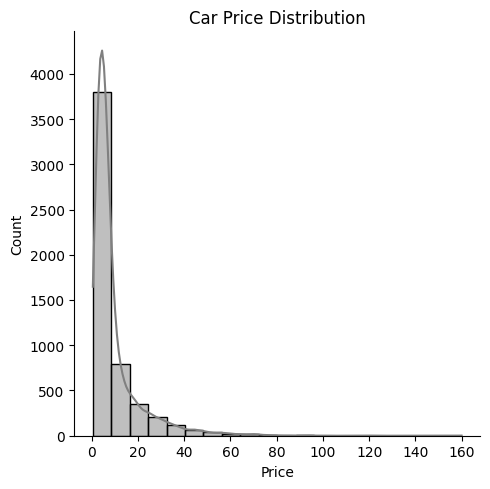

In [11]:
plt.figure(figsize=(7,4))
sns.displot(merged_data["Price"],kde=True,bins=20,color='grey')
plt.title('Car Price Distribution')

plt.tight_layout()
plt.show()

In [12]:
q=merged_data["Price"].quantile(q=0.99)
q

56.42000000000007

In [13]:
car_1=merged_data[merged_data['Price']<q]
car_1.describe(include='all')

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5362,5362,5362.000000,5362.00000,5362,5362,5362,5361,5328,5328,5324.000000,5362.000000
unique,1761,11,NaN,NaN,5,2,4,427,141,351,NaN,NaN
top,Maruti Swift VDI,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,NaN
freq,43,701,NaN,NaN,2832,3890,4382,159,551,213,NaN,NaN
mean,NaN,NaN,2013.334950,57914.17997,NaN,NaN,NaN,NaN,NaN,NaN,5.285124,8.822633
std,NaN,NaN,3.279563,37243.14402,NaN,NaN,NaN,NaN,NaN,NaN,0.803569,9.149309
min,NaN,NaN,1998.000000,171.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.440000
25%,NaN,NaN,2011.000000,34669.25000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.500000
50%,NaN,NaN,2014.000000,53863.50000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.575000
75%,NaN,NaN,2016.000000,73000.00000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,9.555000


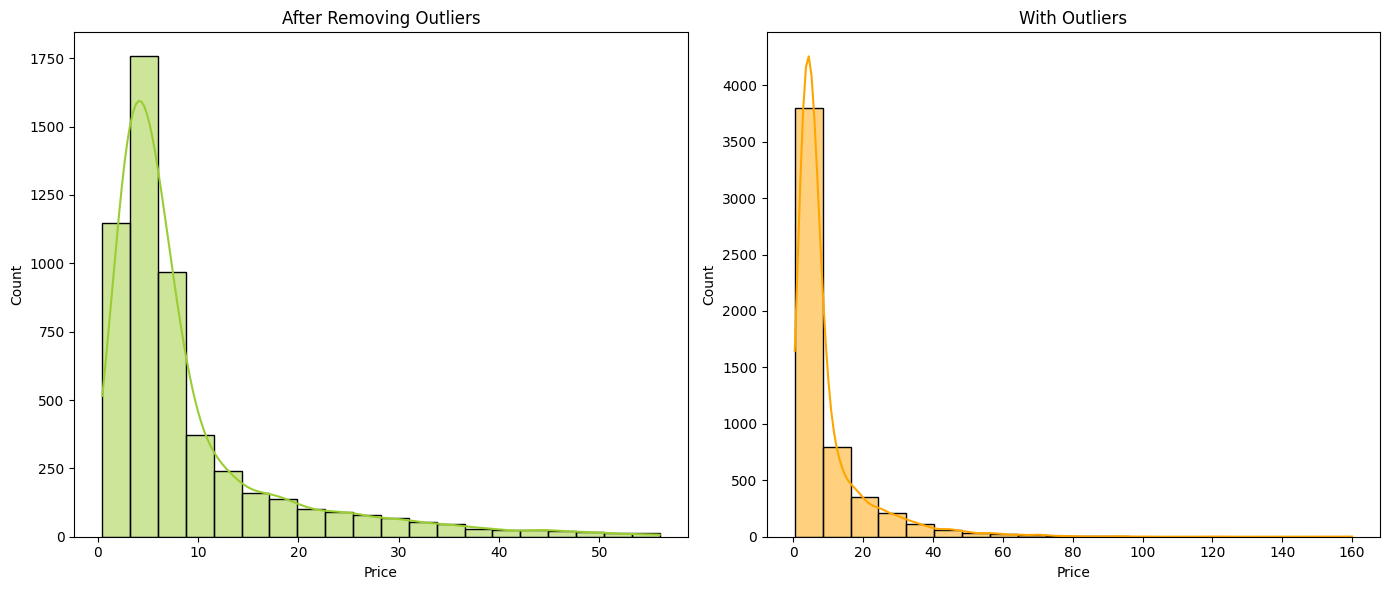

In [14]:
plt.figure(figsize=(14, 6))

# Plotting the distribution after removing outliers (car_1['Price'])
plt.subplot(1, 2, 1)  # Subplot 1
sns.histplot(car_1['Price'], kde=True, bins=20, color='yellowgreen')
plt.title('After Removing Outliers')

# Plotting the distribution with outliers (merged_data['Price'])
plt.subplot(1, 2, 2)  # Subplot 2
sns.histplot(merged_data['Price'], kde=True, bins=20, color='orange')
plt.title('With Outliers')

plt.tight_layout()
plt.show()


In [15]:
car_1.head(2)

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.1 kmpl,998 CC,67.04 bhp,5.0,3.2
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16 kmpl,1968 CC,174.3 bhp,5.0,21.5


C:\Users\vishw\AppData\Local\Temp\ipykernel_33944\231027311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_1['Engine'] = car_1['Engine'].str.replace('CC', '')
C:\Users\vishw\AppData\Local\Temp\ipykernel_33944\231027311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_1['Engine'] = pd.to_numeric(car_1['Engine'], errors='coerce')
C:\Users\vishw\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout

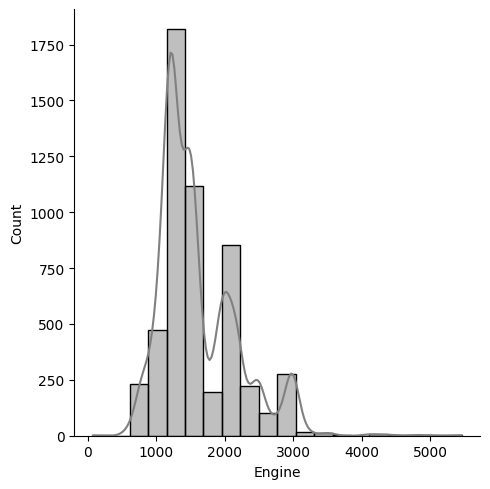

In [16]:
# Removing string (i.e CC) from engine column
car_1['Engine'] = car_1['Engine'].str.replace('CC', '')

# Converting the 'Engine' column to numerical values
car_1['Engine'] = pd.to_numeric(car_1['Engine'], errors='coerce')

car_1.head()
# Creating a distribution plot for the 'Engine' column
sns.displot(car_1['Engine'],kde=True,bins=20,color='grey')

C:\Users\vishw\AppData\Local\Temp\ipykernel_33944\1662196912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_1['Mileage'] = car_1['Mileage'].str.replace('kmpl', '')
C:\Users\vishw\AppData\Local\Temp\ipykernel_33944\1662196912.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_1['Mileage'] = pd.to_numeric(car_1['Mileage'], errors='coerce')
C:\Users\vishw\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tigh

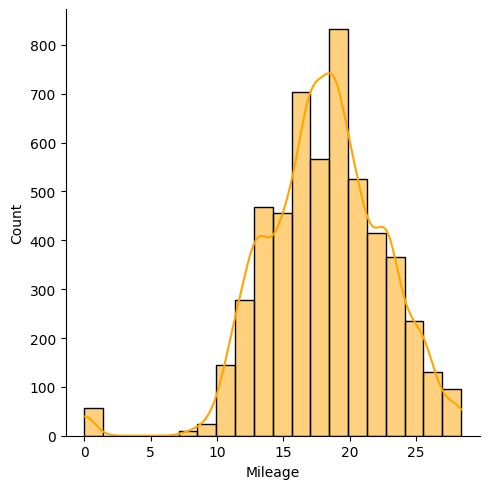

In [17]:
# Removing string (i.e kmpl) from mileage column
car_1['Mileage'] = car_1['Mileage'].str.replace('kmpl', '')

# Converting to numerical
car_1['Mileage'] = pd.to_numeric(car_1['Mileage'], errors='coerce')

car_1.head()
# Creating a distribution plot for the 'Mileage' column
sns.displot(car_1['Mileage'],kde=True,bins=20,color='orange')


In [18]:
# Removing string from power column
car_1['Power'] = car_1['Power'].str.replace('bhp', '')

car_1['Power'] = pd.to_numeric(car_1['Power'], errors='coerce')

car_1

C:\Users\vishw\AppData\Local\Temp\ipykernel_33944\3935170382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_1['Power'] = car_1['Power'].str.replace('bhp', '')
C:\Users\vishw\AppData\Local\Temp\ipykernel_33944\3935170382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_1['Power'] = pd.to_numeric(car_1['Power'], errors='coerce')


,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.10,998.0,67.04,5.0,3.20
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16,1968.0,174.30,5.0,21.50
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59,1364.0,67.10,5.0,4.75
3,Maruti Wagon R LXI CNG,Pune,2012,90400,CNG,Manual,First,NaN,998.0,58.20,5.0,2.90
4,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51,998.0,67.00,5.0,3.87
...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,27000,Petrol,Automatic,First,17.97,1498.0,99.60,5.0,6.75
5413,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,9000,Diesel,Automatic,First,12.62,2198.0,158.00,7.0,32.90
5414,Mahindra XUV500 W8 2WD,Hyderabad,2013,140000,Diesel,Manual,Second,15.10,2179.0,140.00,7.0,9.00
5415,Honda Amaze S i-Dtech,Jaipur,2014,76414,Diesel,Manual,First,25.80,1498.0,98.60,5.0,4.95


In [19]:
q=car_1['Mileage'].quantile(0.01)
car_2=car_1[car_1['Mileage']>q]

C:\Users\vishw\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'After removing outliers')

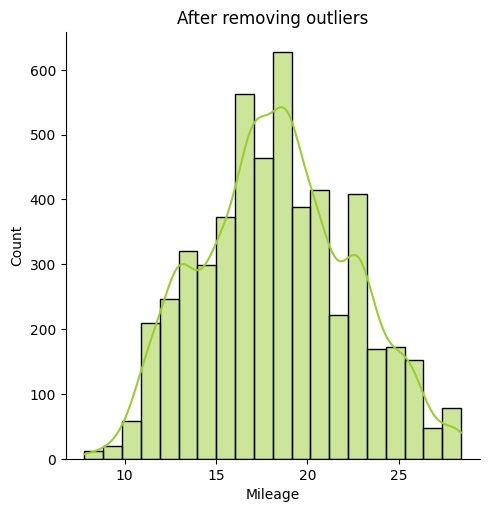

In [20]:
sns.displot(car_2['Mileage'],kde=True,bins=20,color='yellowgreen')
plt.title('After removing outliers')

C:\Users\vishw\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


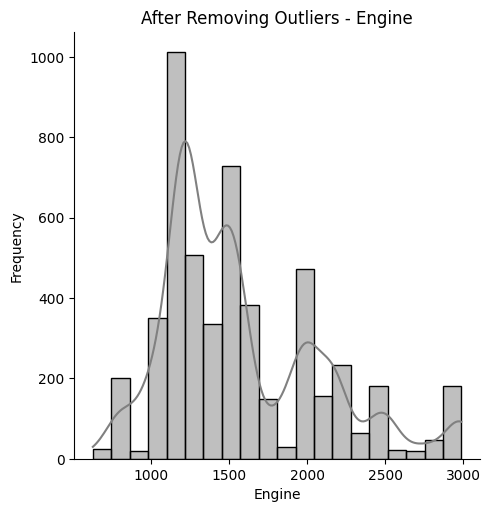

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5412,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,27000,Petrol,Automatic,First,17.97,1498.0,99.6,5.0,6.75
5413,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,9000,Diesel,Automatic,First,12.62,2198.0,158.0,7.0,32.90
5414,Mahindra XUV500 W8 2WD,Hyderabad,2013,140000,Diesel,Manual,Second,15.10,2179.0,140.0,7.0,9.00
5415,Honda Amaze S i-Dtech,Jaipur,2014,76414,Diesel,Manual,First,25.80,1498.0,98.6,5.0,4.95
5416,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,Kolkata,2011,98000,Diesel,Manual,Second,12.80,2494.0,102.0,8.0,5.50


In [21]:
# Calculating the 99th percentile of 'Engine' values in car_2
q = car_2['Engine'].quantile(0.99)

# Filtering car_2 to keep rows where 'Engine' values are less than the 99th percentile
car_3 = car_2[car_2['Engine'] < q]

# Creating a distribution plot for the 'Engine' column in car_3 after removing outliers
sns.displot(car_3['Engine'], kde=True, bins=20, color='grey')
plt.title('After Removing Outliers - Engine')
plt.xlabel('Engine')
plt.ylabel('Frequency')
plt.show()

# Displaying the last 5 rows of the car_3 DataFrame
car_3.tail(5)


C:\Users\vishw\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


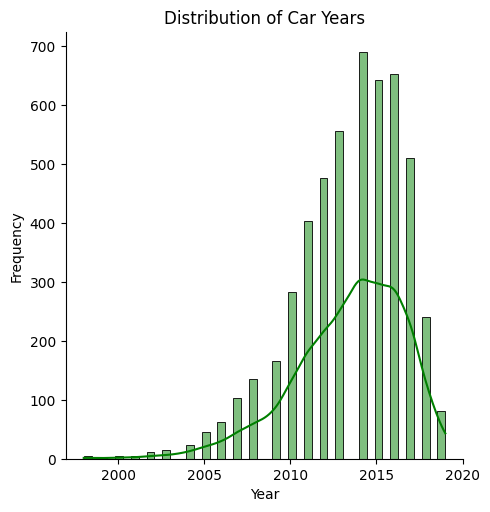

In [22]:
# Creating a distribution plot for the 'Year' column in car_3
sns.displot(car_3['Year'], kde=True, color='green')
plt.title('Distribution of Car Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()


In [23]:
car_3

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.10,998.0,67.04,5.0,3.20
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16,1968.0,174.30,5.0,21.50
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59,1364.0,67.10,5.0,4.75
4,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51,998.0,67.00,5.0,3.87
5,Hyundai i20 1.4 Sportz,Ahmedabad,2018,30000,Diesel,Manual,First,22.54,1396.0,88.73,5.0,7.75
...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,27000,Petrol,Automatic,First,17.97,1498.0,99.60,5.0,6.75
5413,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,9000,Diesel,Automatic,First,12.62,2198.0,158.00,7.0,32.90
5414,Mahindra XUV500 W8 2WD,Hyderabad,2013,140000,Diesel,Manual,Second,15.10,2179.0,140.00,7.0,9.00
5415,Honda Amaze S i-Dtech,Jaipur,2014,76414,Diesel,Manual,First,25.80,1498.0,98.60,5.0,4.95


In [24]:
# Arranging index in order
clean_data=car_3.reset_index(drop=True)

clean_data


,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.10,998.0,67.04,5.0,3.20
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16,1968.0,174.30,5.0,21.50
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59,1364.0,67.10,5.0,4.75
3,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51,998.0,67.00,5.0,3.87
4,Hyundai i20 1.4 Sportz,Ahmedabad,2018,30000,Diesel,Manual,First,22.54,1396.0,88.73,5.0,7.75
...,...,...,...,...,...,...,...,...,...,...,...,...
5102,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,27000,Petrol,Automatic,First,17.97,1498.0,99.60,5.0,6.75
5103,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,9000,Diesel,Automatic,First,12.62,2198.0,158.00,7.0,32.90
5104,Mahindra XUV500 W8 2WD,Hyderabad,2013,140000,Diesel,Manual,Second,15.10,2179.0,140.00,7.0,9.00
5105,Honda Amaze S i-Dtech,Jaipur,2014,76414,Diesel,Manual,First,25.80,1498.0,98.60,5.0,4.95


In [25]:
# Median Inputing for missing values
columns_to_fill = ['Mileage', 'Engine', 'Power','Seats']
for col in columns_to_fill:
    median_value = clean_data[col].median()  # Calculate median for the column
    clean_data[col].fillna(median_value, inplace=True)
clean_data.isnull().sum()

Brand                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [26]:
clean_data.rename(columns={'Engine': 'Engine(in_CC)', 'Mileage': 'Mileage(in_kmpl)','Power':'Power(in_bhp)'}, inplace=True)
clean_data

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(in_kmpl),Engine(in_CC),Power(in_bhp),Seats,Price
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.10,998.0,67.04,5.0,3.20
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16,1968.0,174.30,5.0,21.50
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59,1364.0,67.10,5.0,4.75
3,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51,998.0,67.00,5.0,3.87
4,Hyundai i20 1.4 Sportz,Ahmedabad,2018,30000,Diesel,Manual,First,22.54,1396.0,88.73,5.0,7.75
...,...,...,...,...,...,...,...,...,...,...,...,...
5102,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,27000,Petrol,Automatic,First,17.97,1498.0,99.60,5.0,6.75
5103,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,9000,Diesel,Automatic,First,12.62,2198.0,158.00,7.0,32.90
5104,Mahindra XUV500 W8 2WD,Hyderabad,2013,140000,Diesel,Manual,Second,15.10,2179.0,140.00,7.0,9.00
5105,Honda Amaze S i-Dtech,Jaipur,2014,76414,Diesel,Manual,First,25.80,1498.0,98.60,5.0,4.95


In [27]:
merged_data.shape[0]-clean_data.shape[0]

310

In [28]:
# Saving our data file
clean_data.to_csv('car_cleaned.csv',index=False)

In [29]:
# Loading test data
test=pd.read_csv('test_data.csv')

test.describe(include='all')

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
count,602,602,602.000000,602.000000,602,602,602,601,600,600,598.000000
unique,455,11,NaN,NaN,5,2,4,236,90,195,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN
freq,6,84,NaN,NaN,329,409,498,17,55,22,NaN
mean,NaN,NaN,2013.308970,57942.551495,NaN,NaN,NaN,NaN,NaN,NaN,5.264214
std,NaN,NaN,3.143948,43329.671873,NaN,NaN,NaN,NaN,NaN,NaN,0.785392
min,NaN,NaN,2003.000000,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,NaN,2011.000000,32391.500000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,NaN,2014.000000,52308.500000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,2016.000000,75000.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [30]:
test.head()


,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Swift Dzire VDI,Hyderabad,2013,69000,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,26741,Diesel,Manual,First,15.4 kmpl,1997 CC,120 bhp,7.0
2,Mahindra XUV500 W8 2WD,Delhi,2014,86000,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0
3,Tata Indigo CS eVX,Pune,2016,52000,Diesel,Manual,Second,25.0 kmpl,1396 CC,69.01 bhp,5.0
4,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN


In [31]:
test.isnull().sum()


Brand                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              1
Engine               2
Power                2
Seats                4
dtype: int64

In [32]:
# Removing string from engine column
test['Engine'] = test['Engine'].str.replace('CC', '')

# Converting to numerical
test['Engine'] = pd.to_numeric(test['Engine'], errors='coerce')

test.head()



,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Swift Dzire VDI,Hyderabad,2013,69000,Diesel,Manual,First,23.4 kmpl,1248.0,74 bhp,5.0
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,26741,Diesel,Manual,First,15.4 kmpl,1997.0,120 bhp,7.0
2,Mahindra XUV500 W8 2WD,Delhi,2014,86000,Diesel,Manual,First,15.1 kmpl,2179.0,140 bhp,7.0
3,Tata Indigo CS eVX,Pune,2016,52000,Diesel,Manual,Second,25.0 kmpl,1396.0,69.01 bhp,5.0
4,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN


In [33]:
# Removing string from mileage column
test['Mileage'] = test['Mileage'].str.replace('kmpl', '')

# Converting to numerical
test['Mileage'] = pd.to_numeric(test['Mileage'], errors='coerce')


In [34]:
# Removing string from power column
test['Power'] = test['Power'].str.replace('bhp', '')

test['Power'] = pd.to_numeric(test['Power'], errors='coerce')


In [35]:
# Arranging index in order
clean_data=test.reset_index(drop=True)

clean_data


,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Swift Dzire VDI,Hyderabad,2013,69000,Diesel,Manual,First,23.40,1248.0,74.00,5.0
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,26741,Diesel,Manual,First,15.40,1997.0,120.00,7.0
2,Mahindra XUV500 W8 2WD,Delhi,2014,86000,Diesel,Manual,First,15.10,2179.0,140.00,7.0
3,Tata Indigo CS eVX,Pune,2016,52000,Diesel,Manual,Second,25.00,1396.0,69.01,5.0
4,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
597,Toyota Corolla Altis 2008-2013 1.8 VL AT,Mumbai,2008,78000,Petrol,Automatic,Second,14.53,1794.0,138.10,5.0
598,Hyundai i10 Magna 1.2,Chennai,2012,55231,Petrol,Manual,Second,20.36,1197.0,78.90,5.0
599,Maruti Swift Dzire VDi,Jaipur,2010,130000,Diesel,Manual,Second,19.30,1248.0,73.90,5.0
600,Mercedes-Benz E-Class 2015-2017 E250 Edition E,Ahmedabad,2016,39500,Diesel,Automatic,First,15.00,2143.0,204.00,5.0


In [36]:
columns_to_fill = ['Mileage', 'Engine', 'Power','Seats']
for col in columns_to_fill:
    median_value = clean_data[col].median()  # Calculate median for the column
    clean_data[col].fillna(median_value, inplace=True)
clean_data.isnull().sum()

Brand                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [37]:
clean_data.rename(columns={'Engine': 'Engine(in_CC)', 'Mileage': 'Mileage(in_kmpl)','Power':'Power(in_bhp)'}, inplace=True)
clean_data

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(in_kmpl),Engine(in_CC),Power(in_bhp),Seats
0,Maruti Swift Dzire VDI,Hyderabad,2013,69000,Diesel,Manual,First,23.40,1248.0,74.000,5.0
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,26741,Diesel,Manual,First,15.40,1997.0,120.000,7.0
2,Mahindra XUV500 W8 2WD,Delhi,2014,86000,Diesel,Manual,First,15.10,2179.0,140.000,7.0
3,Tata Indigo CS eVX,Pune,2016,52000,Diesel,Manual,Second,25.00,1396.0,69.010,5.0
4,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.00,1493.0,98.595,5.0
...,...,...,...,...,...,...,...,...,...,...,...
597,Toyota Corolla Altis 2008-2013 1.8 VL AT,Mumbai,2008,78000,Petrol,Automatic,Second,14.53,1794.0,138.100,5.0
598,Hyundai i10 Magna 1.2,Chennai,2012,55231,Petrol,Manual,Second,20.36,1197.0,78.900,5.0
599,Maruti Swift Dzire VDi,Jaipur,2010,130000,Diesel,Manual,Second,19.30,1248.0,73.900,5.0
600,Mercedes-Benz E-Class 2015-2017 E250 Edition E,Ahmedabad,2016,39500,Diesel,Automatic,First,15.00,2143.0,204.000,5.0


In [38]:
# Saving our data file
clean_data.to_csv('test_cleaned.csv',index=False)

 EXPLORATORY DATA ANALYSIS -
 After preprocessing the data, it is analyzed through visual exploration to gather insights about the model that can be applied to the data, understand the diversity in the data and the range of every field. We use a bar chart, box plot, distribution graph, etc. to explore each feature varies and its relation with other features including the target feature.



In [39]:
car=pd.read_csv('car_cleaned.csv')
car.head()

car_test=pd.read_csv('test_cleaned.csv')
car_test.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(in_kmpl),Engine(in_CC),Power(in_bhp),Seats
0,Maruti Swift Dzire VDI,Hyderabad,2013,69000,Diesel,Manual,First,23.4,1248.0,74.000,5.0
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,26741,Diesel,Manual,First,15.4,1997.0,120.000,7.0
2,Mahindra XUV500 W8 2WD,Delhi,2014,86000,Diesel,Manual,First,15.1,2179.0,140.000,7.0
3,Tata Indigo CS eVX,Pune,2016,52000,Diesel,Manual,Second,25.0,1396.0,69.010,5.0
4,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.0,1493.0,98.595,5.0


In [40]:
car.describe(include='all')

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(in_kmpl),Engine(in_CC),Power(in_bhp),Seats,Price
count,5107,5107,5107.000000,5107.000000,5107,5107,5107,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000
unique,1635,11,NaN,NaN,2,2,4,NaN,NaN,NaN,NaN,NaN
top,Maruti Swift VDI,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN
freq,43,656,NaN,NaN,2716,3777,4186,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2013.411005,57765.265126,NaN,NaN,NaN,18.457429,1570.692187,107.713635,5.289407,8.375573
std,NaN,NaN,3.221862,37348.626981,NaN,NaN,NaN,4.023096,514.956836,43.192213,0.788710,8.350777
min,NaN,NaN,1998.000000,171.000000,NaN,NaN,NaN,8.450000,624.000000,34.200000,2.000000,0.440000
25%,NaN,NaN,2012.000000,34232.500000,NaN,NaN,NaN,15.600000,1198.000000,76.400000,5.000000,3.500000
50%,NaN,NaN,2014.000000,53322.000000,NaN,NaN,NaN,18.500000,1461.000000,91.100000,5.000000,5.500000
75%,NaN,NaN,2016.000000,73000.000000,NaN,NaN,NaN,21.100000,1968.000000,126.320000,5.000000,9.200000


Text(0.5, 1.0, 'Year vs Price')

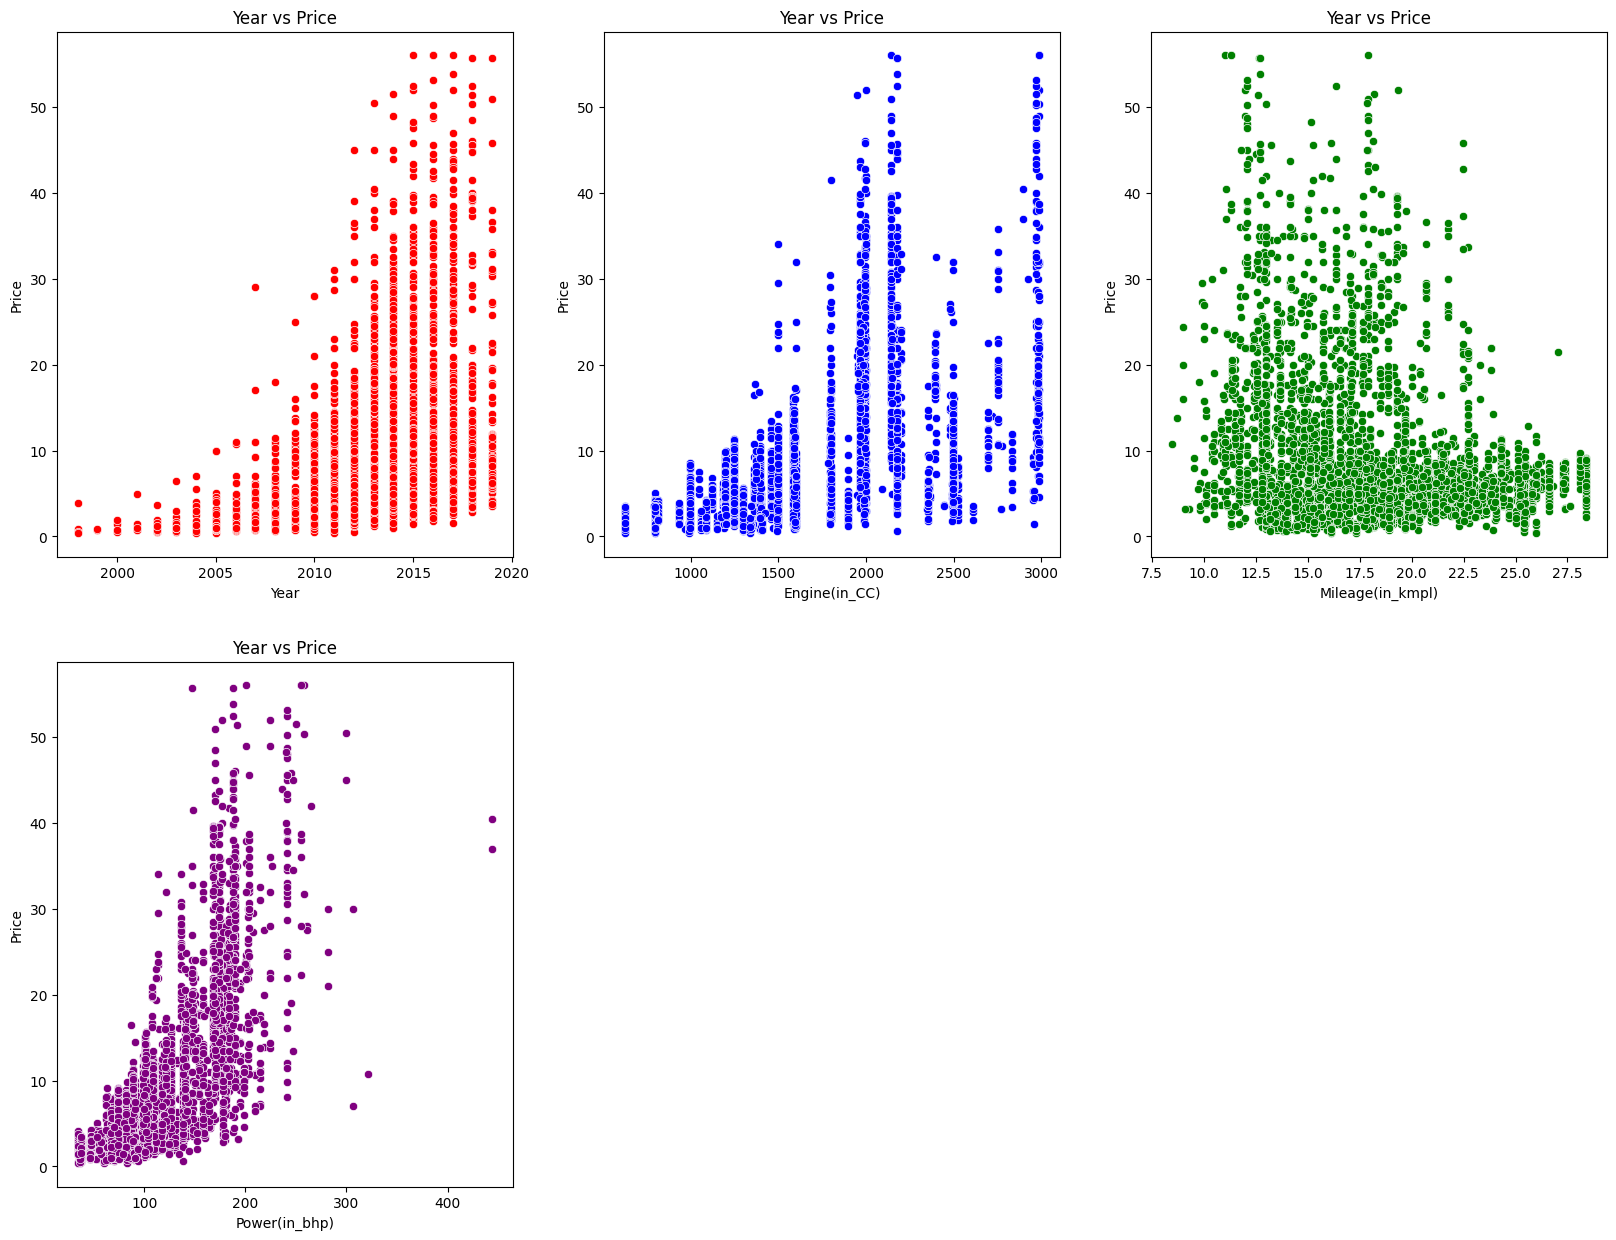

In [41]:
plt.figure(figsize=(20,15))


plt.subplot(2,3,1)
sns.scatterplot(x=car['Year'],y=car['Price'], color ='red')
plt.title('Year vs Price')

plt.subplot(2,3,2)
sns.scatterplot(x=car['Engine(in_CC)'],y=car['Price'], color='blue')
plt.title('Year vs Price')

plt.subplot(2,3,3)
sns.scatterplot(x=car['Mileage(in_kmpl)'],y=car['Price'],color='green')
plt.title('Year vs Price')

plt.subplot(2,3,4)
sns.scatterplot(x=car['Power(in_bhp)'],y=car['Price'],color='purple')
plt.title('Year vs Price')



C:\Users\vishw\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


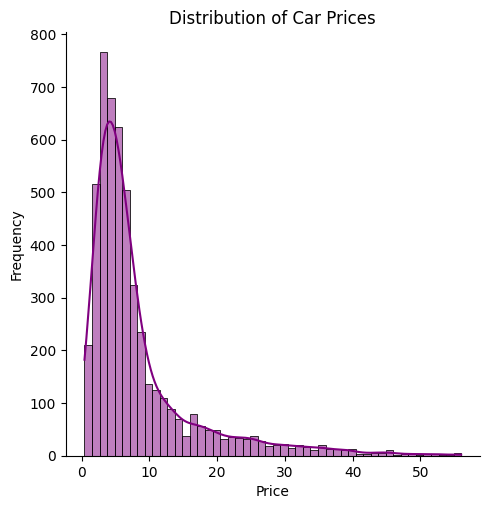

In [42]:
# Creating a distribution plot for the 'Price' column in the car DataFrame
sns.displot(car['Price'], kde=True, bins=50, color='purple')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [43]:
# As or price in data is not linear so we took its log
log_price=np.log(car['Price'])

car['log_price']=log_price

car.head() 

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(in_kmpl),Engine(in_CC),Power(in_bhp),Seats,Price,log_price
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.10,998.0,67.04,5.0,3.20,1.163151
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16,1968.0,174.30,5.0,21.50,3.068053
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59,1364.0,67.10,5.0,4.75,1.558145
3,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51,998.0,67.00,5.0,3.87,1.353255
4,Hyundai i20 1.4 Sportz,Ahmedabad,2018,30000,Diesel,Manual,First,22.54,1396.0,88.73,5.0,7.75,2.047693


C:\Users\vishw\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 700x400 with 0 Axes>

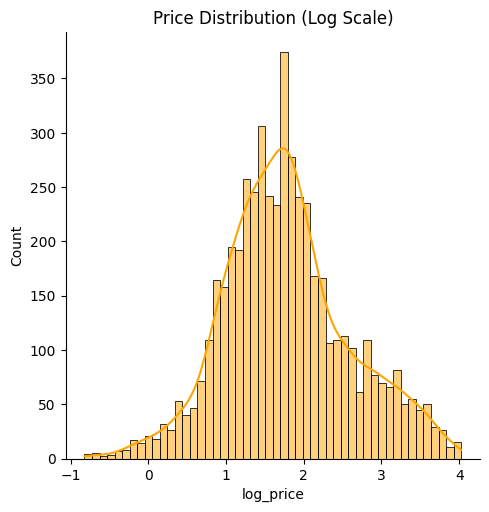

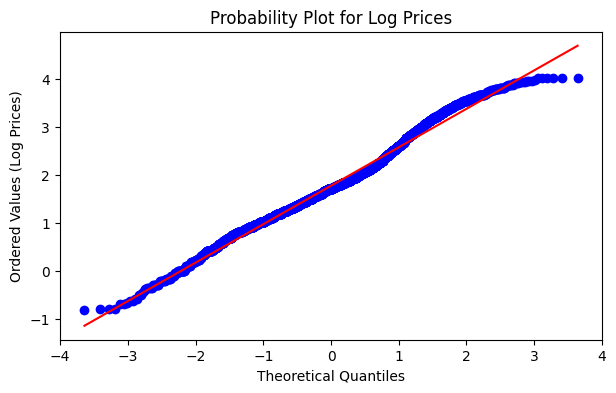

In [44]:

#'car' is DataFrame and 'log_price' is the logarithm of prices
# For the distribution plot
plt.figure(figsize=(7, 4))
sns.displot(car['log_price'], kde=True, bins=50, color='orange')  # Changing the color to orange
plt.title('Price Distribution (Log Scale)')

# For the probability plot
plt.figure(figsize=(7, 4))
stats.probplot(car['log_price'], dist="norm", plot=plt)
plt.title('Probability Plot for Log Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values (Log Prices)')
plt.show()

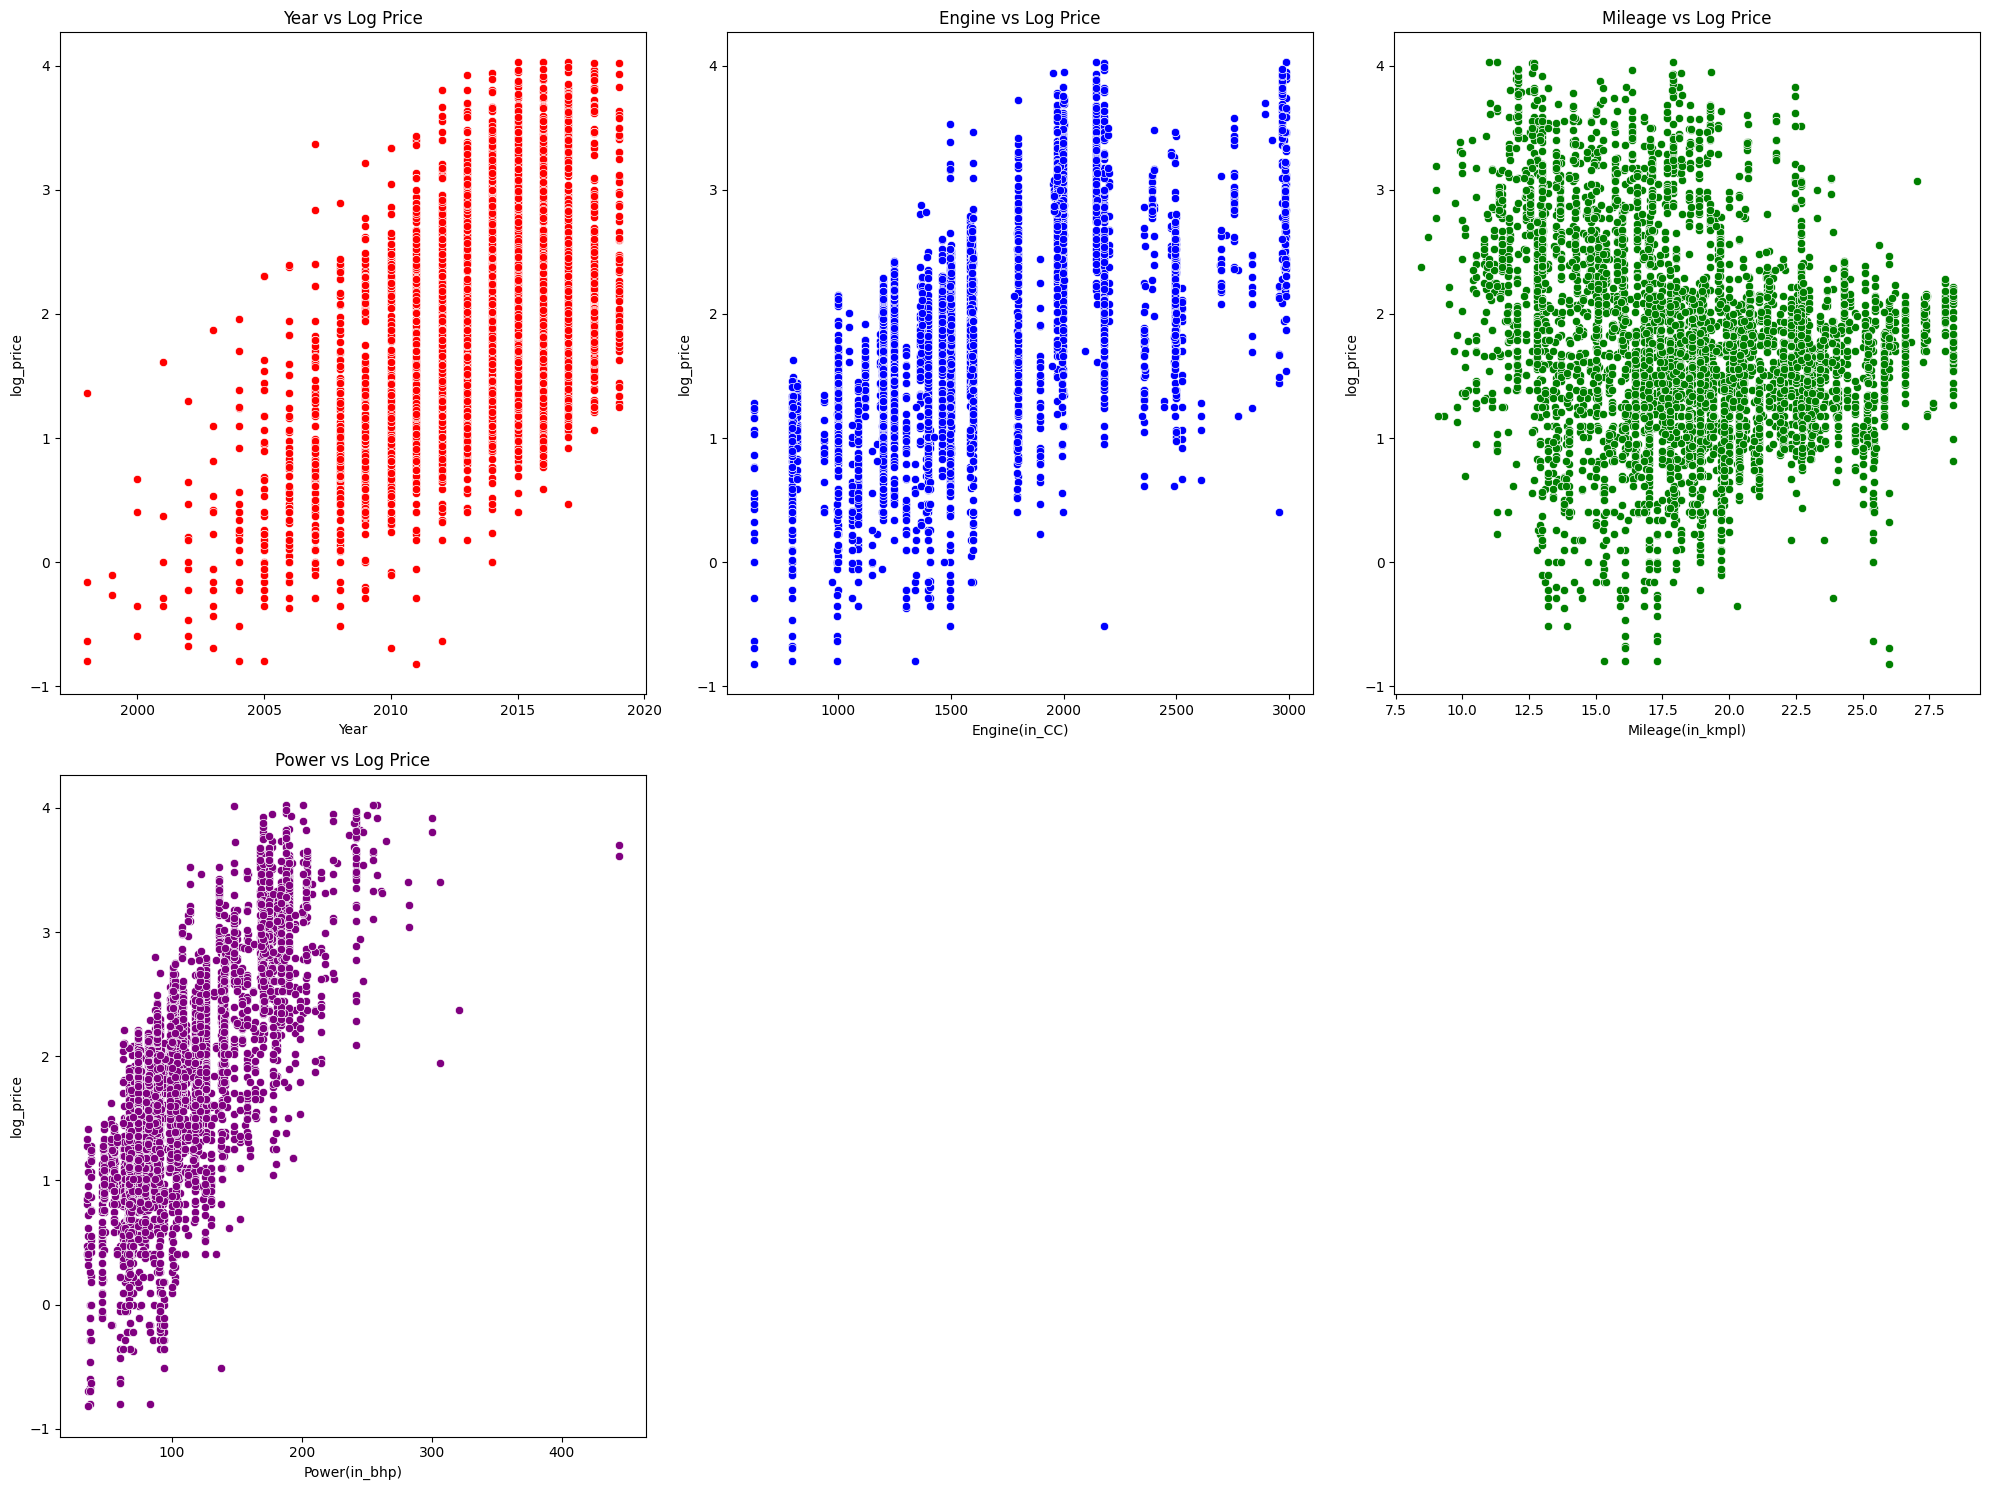

In [45]:


plt.figure(figsize=(20, 15))

plt.subplot(2, 3, 1)
sns.scatterplot(x=car['Year'], y=car['log_price'], color='red')
plt.title('Year vs Log Price')

plt.subplot(2, 3, 2)
sns.scatterplot(x=car['Engine(in_CC)'], y=car['log_price'], color='blue')
plt.title('Engine vs Log Price')

plt.subplot(2, 3, 3)
sns.scatterplot(x=car['Mileage(in_kmpl)'], y=car['log_price'], color='green')
plt.title('Mileage vs Log Price')

plt.subplot(2, 3, 4)
sns.scatterplot(x=car['Power(in_bhp)'], y=car['log_price'], color='purple')
plt.title('Power vs Log Price')

plt.tight_layout()
plt.show()


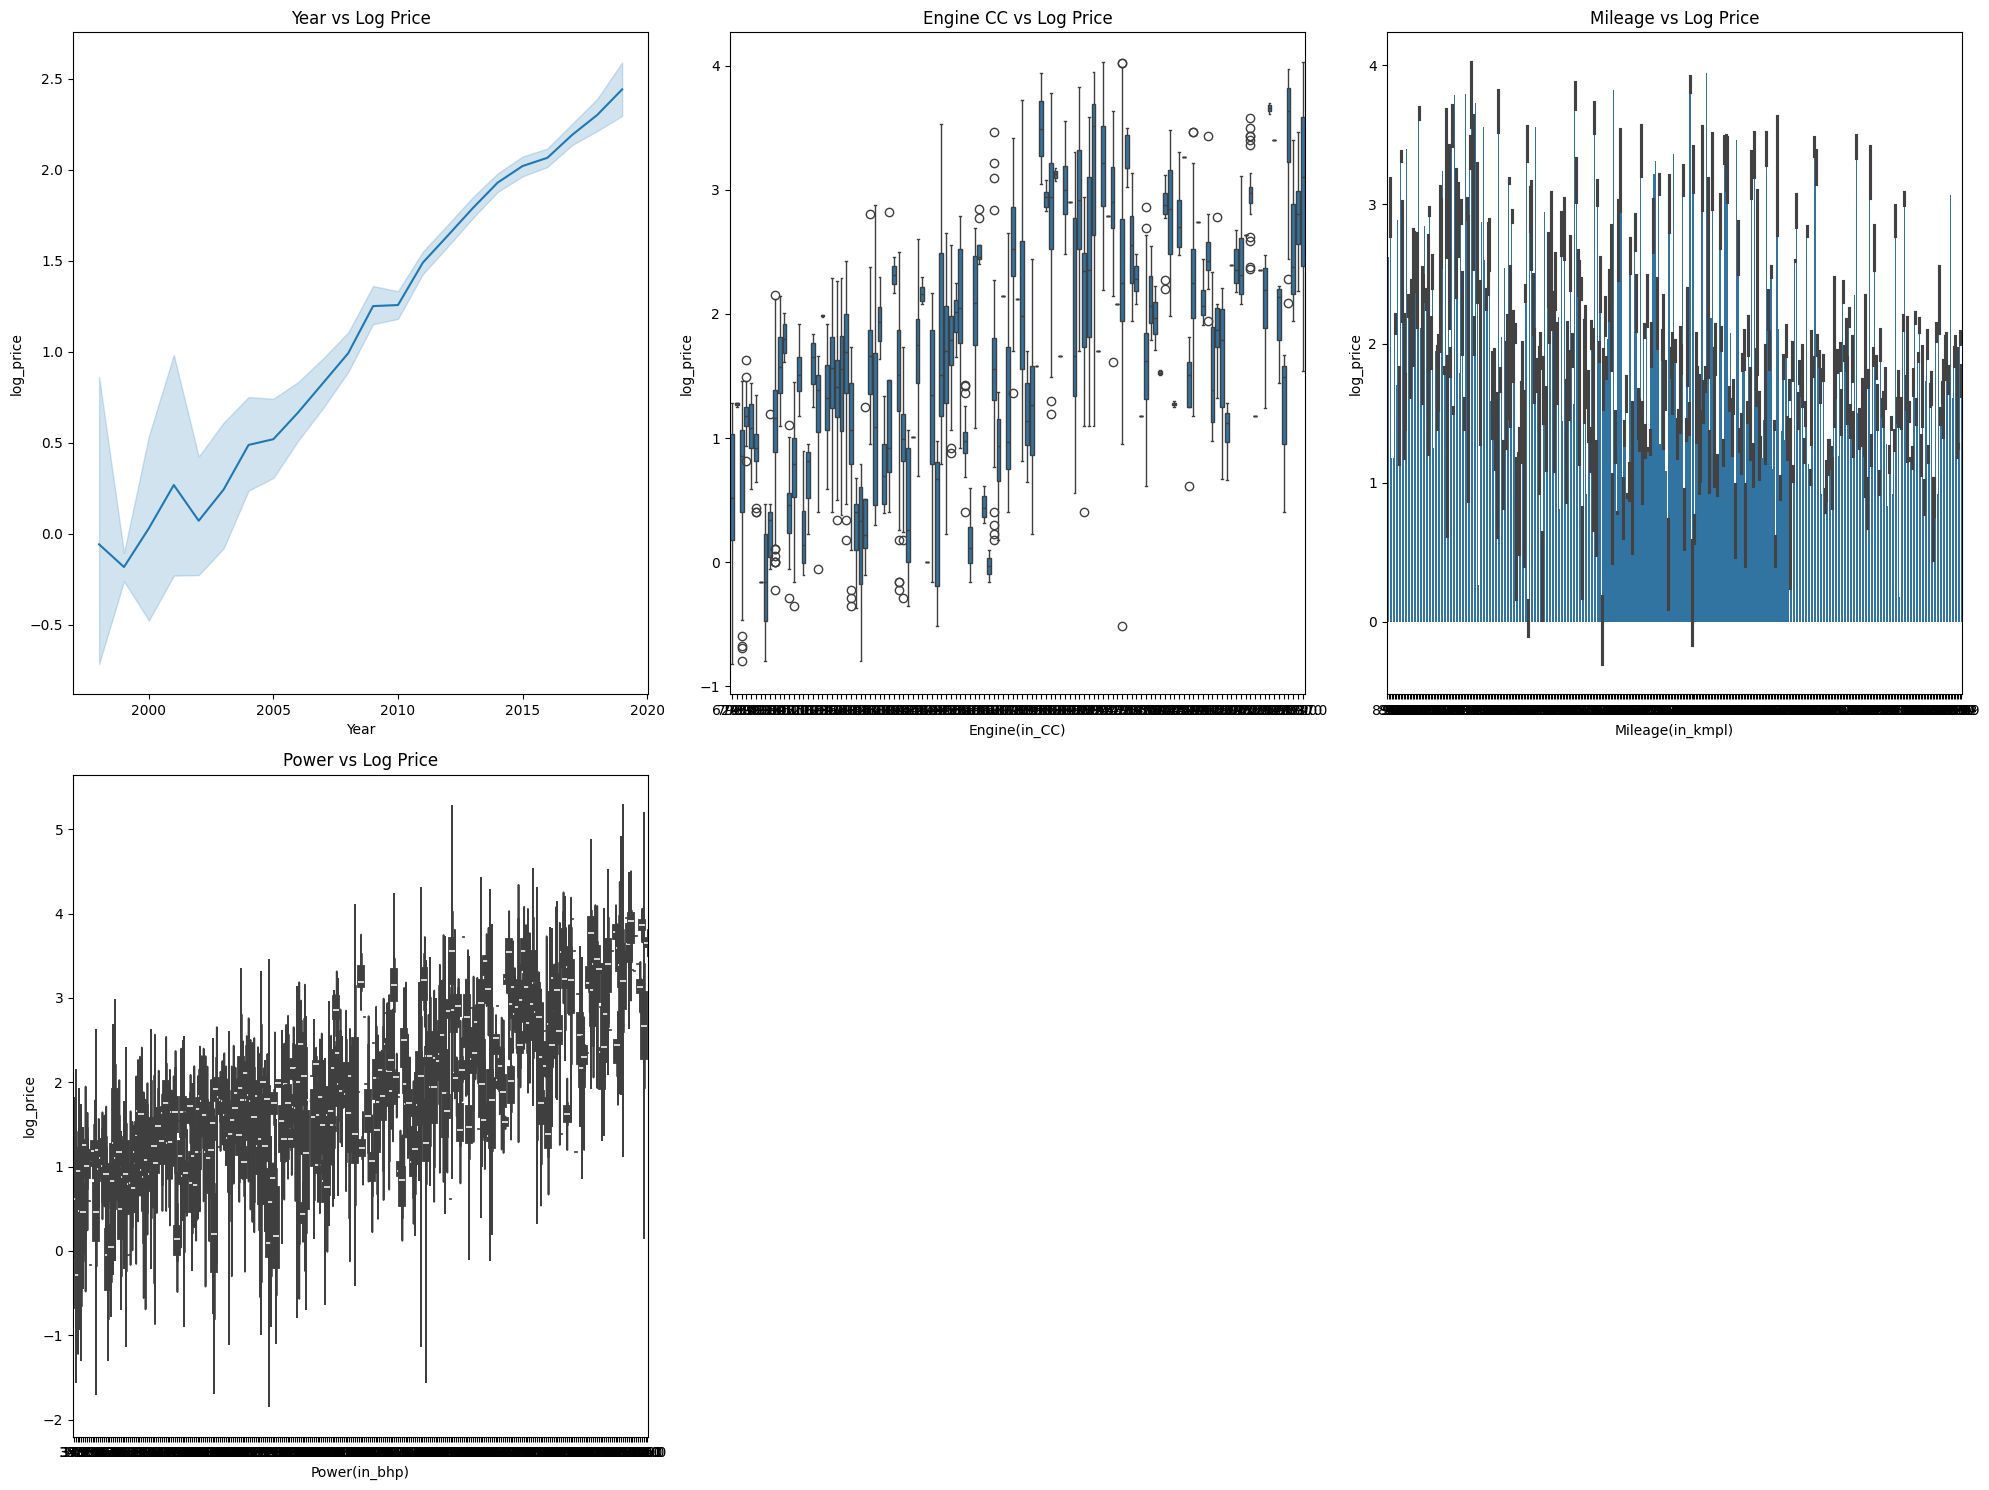

In [46]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.lineplot(x=car['Year'], y=car['log_price'])
plt.title('Year vs Log Price')

plt.subplot(2,3,2)
sns.boxplot(x=car['Engine(in_CC)'], y=car['log_price'])
plt.title('Engine CC vs Log Price')

plt.subplot(2,3,3)
sns.barplot(x=car['Mileage(in_kmpl)'], y=car['log_price'])
plt.title('Mileage vs Log Price')

plt.subplot(2,3,4)
sns.violinplot(x=car['Power(in_bhp)'], y=car['log_price'])
plt.title('Power vs Log Price')

plt.tight_layout()
plt.show()


In [47]:
car.drop('Price',axis=1,inplace=True)
car.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(in_kmpl),Engine(in_CC),Power(in_bhp),Seats,log_price
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.10,998.0,67.04,5.0,1.163151
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16,1968.0,174.30,5.0,3.068053
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59,1364.0,67.10,5.0,1.558145
3,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51,998.0,67.00,5.0,1.353255
4,Hyundai i20 1.4 Sportz,Ahmedabad,2018,30000,Diesel,Manual,First,22.54,1396.0,88.73,5.0,2.047693


In [48]:


# Check for NaN values in 'car' DataFrame
print(car.isna().sum())

# Remove rows with NaN or Inf values in 'car'
car.replace([np.inf, -np.inf], np.nan, inplace=True)
car.dropna(axis=0, inplace=True)

print('After removing NaN or Inf values in car\n', car.isna().sum())
print('--' * 50)

# Check for NaN values in 'car_test' DataFrame
print(car_test.isna().sum())

# Remove rows with NaN or Inf values in 'car_test'
car_test.replace([np.inf, -np.inf], np.nan, inplace=True)
car_test.dropna(axis=0, inplace=True)

print('After removing NaN or Inf values in car_test\n', car_test.isna().sum())


Brand                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage(in_kmpl)     0
Engine(in_CC)        0
Power(in_bhp)        0
Seats                0
log_price            0
dtype: int64
After removing NaN or Inf values in car
 Brand                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage(in_kmpl)     0
Engine(in_CC)        0
Power(in_bhp)        0
Seats                0
log_price            0
dtype: int64
----------------------------------------------------------------------------------------------------
Brand                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage(in_kmpl)     0
Engine(in_CC)        0
Power(in_bhp)        0
Seats                0
dtype: int64
After removing

In [49]:

target_encoder = ce.TargetEncoder(cols=['Brand'], smoothing=10)  #  adjust the smoothing parameter
car['Brand_TargetEncoded'] = target_encoder.fit_transform(car['Brand'],car['log_price'])
car

car_test['Brand_TargetEncoded'] = target_encoder.transform(car_test['Brand'])



In [50]:
car

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(in_kmpl),Engine(in_CC),Power(in_bhp),Seats,log_price,Brand_TargetEncoded
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.10,998.0,67.04,5.0,1.163151,1.702290
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16,1968.0,174.30,5.0,3.068053,2.017469
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59,1364.0,67.10,5.0,1.558145,1.750150
3,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51,998.0,67.00,5.0,1.353255,1.723895
4,Hyundai i20 1.4 Sportz,Ahmedabad,2018,30000,Diesel,Manual,First,22.54,1396.0,88.73,5.0,2.047693,1.826241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,27000,Petrol,Automatic,First,17.97,1498.0,99.60,5.0,1.909543,1.794809
5103,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,9000,Diesel,Automatic,First,12.62,2198.0,158.00,7.0,3.493473,2.000892
5104,Mahindra XUV500 W8 2WD,Hyderabad,2013,140000,Diesel,Manual,Second,15.10,2179.0,140.00,7.0,2.197225,2.090753
5105,Honda Amaze S i-Dtech,Jaipur,2014,76414,Diesel,Manual,First,25.80,1498.0,98.60,5.0,1.599388,1.572400


In [51]:
car_test

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(in_kmpl),Engine(in_CC),Power(in_bhp),Seats,Brand_TargetEncoded
0,Maruti Swift Dzire VDI,Hyderabad,2013,69000,Diesel,Manual,First,23.40,1248.0,74.000,5.0,1.702498
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,26741,Diesel,Manual,First,15.40,1997.0,120.000,7.0,1.777649
2,Mahindra XUV500 W8 2WD,Delhi,2014,86000,Diesel,Manual,First,15.10,2179.0,140.000,7.0,2.090753
3,Tata Indigo CS eVX,Pune,2016,52000,Diesel,Manual,Second,25.00,1396.0,69.010,5.0,1.635759
4,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.00,1493.0,98.595,5.0,1.777649
...,...,...,...,...,...,...,...,...,...,...,...,...
597,Toyota Corolla Altis 2008-2013 1.8 VL AT,Mumbai,2008,78000,Petrol,Automatic,Second,14.53,1794.0,138.100,5.0,1.839953
598,Hyundai i10 Magna 1.2,Chennai,2012,55231,Petrol,Manual,Second,20.36,1197.0,78.900,5.0,1.471787
599,Maruti Swift Dzire VDi,Jaipur,2010,130000,Diesel,Manual,Second,19.30,1248.0,73.900,5.0,1.659891
600,Mercedes-Benz E-Class 2015-2017 E250 Edition E,Ahmedabad,2016,39500,Diesel,Automatic,First,15.00,2143.0,204.000,5.0,2.081812


In [52]:
target_encoder = ce.TargetEncoder(cols=['Location'], smoothing=10)  #  Adjust the smoothing parameter
car['Location_TargetEncoded'] = target_encoder.fit_transform(car['Location'],car['log_price'])
car

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(in_kmpl),Engine(in_CC),Power(in_bhp),Seats,log_price,Brand_TargetEncoded,Location_TargetEncoded
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.10,998.0,67.04,5.0,1.163151,1.702290,1.849076
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16,1968.0,174.30,5.0,3.068053,2.017469,1.849076
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59,1364.0,67.10,5.0,1.558145,1.750150,1.508391
3,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51,998.0,67.00,5.0,1.353255,1.723895,1.441056
4,Hyundai i20 1.4 Sportz,Ahmedabad,2018,30000,Diesel,Manual,First,22.54,1396.0,88.73,5.0,2.047693,1.826241,1.798172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,27000,Petrol,Automatic,First,17.97,1498.0,99.60,5.0,1.909543,1.794809,1.570612
5103,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,9000,Diesel,Automatic,First,12.62,2198.0,158.00,7.0,3.493473,2.000892,1.570612
5104,Mahindra XUV500 W8 2WD,Hyderabad,2013,140000,Diesel,Manual,Second,15.10,2179.0,140.00,7.0,2.197225,2.090753,1.809005
5105,Honda Amaze S i-Dtech,Jaipur,2014,76414,Diesel,Manual,First,25.80,1498.0,98.60,5.0,1.599388,1.572400,1.441056


In [53]:
car_test['Location_TargetEncoded'] = target_encoder.transform(car_test['Location'])
car_test

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(in_kmpl),Engine(in_CC),Power(in_bhp),Seats,Brand_TargetEncoded,Location_TargetEncoded
0,Maruti Swift Dzire VDI,Hyderabad,2013,69000,Diesel,Manual,First,23.40,1248.0,74.000,5.0,1.702498,1.809005
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,26741,Diesel,Manual,First,15.40,1997.0,120.000,7.0,1.777649,2.005138
2,Mahindra XUV500 W8 2WD,Delhi,2014,86000,Diesel,Manual,First,15.10,2179.0,140.000,7.0,2.090753,1.849076
3,Tata Indigo CS eVX,Pune,2016,52000,Diesel,Manual,Second,25.00,1396.0,69.010,5.0,1.635759,1.508391
4,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.00,1493.0,98.595,5.0,1.777649,1.508391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Toyota Corolla Altis 2008-2013 1.8 VL AT,Mumbai,2008,78000,Petrol,Automatic,Second,14.53,1794.0,138.100,5.0,1.839953,1.828577
598,Hyundai i10 Magna 1.2,Chennai,2012,55231,Petrol,Manual,Second,20.36,1197.0,78.900,5.0,1.471787,1.570612
599,Maruti Swift Dzire VDi,Jaipur,2010,130000,Diesel,Manual,Second,19.30,1248.0,73.900,5.0,1.659891,1.441056
600,Mercedes-Benz E-Class 2015-2017 E250 Edition E,Ahmedabad,2016,39500,Diesel,Automatic,First,15.00,2143.0,204.000,5.0,2.081812,1.798172


In [54]:
car.to_csv('Intermediate2.csv',index=False)

In [55]:
car = car.drop(columns=['Location','Brand'])

In [56]:
car_test = car_test.drop(columns=['Location','Brand'])

One Hot Encoding

In [57]:
# Define your categorical columns
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type']

# Initialize the OneHotEncoder from category_encoders
encoder = ce.OneHotEncoder(cols=categorical_columns, use_cat_names=False)

# Fit and transform the categorical columns
car_encoded = encoder.fit_transform(car)

column_mapping = {
    'Fuel_Type_1': 'Fuel_Petrol',  # Assuming 'Fuel_Type_1' corresponds to 'Diesel'
    'Fuel_Type_2': 'Fuel_Diesel',  # Assuming 'Fuel_Type_2' corresponds to 'Petrol'
    'Transmission_1': 'Transmission_Automatic',
    'Transmission_2':'Transmission_Manual',
    'Owner_Type_1':'Owner(Second)',
    'Owner_Type_2':'Owner(First)',
    'Owner_Type_3':'Owner(Third)',
    'Owner_Type_4':'Owner(Fourth)'

}

car_encoded.rename(columns=column_mapping, inplace=True)

(car_encoded).tail(100)
car_encoded.to_csv('intermediate.csv,index=False')
car_encoded



,Year,Kilometers_Driven,Fuel_Petrol,Fuel_Diesel,Transmission_Automatic,Transmission_Manual,Owner(Second),Owner(First),Owner(Third),Owner(Fourth),Mileage(in_kmpl),Engine(in_CC),Power(in_bhp),Seats,log_price,Brand_TargetEncoded,Location_TargetEncoded
0,2014,35214,1,0,1,0,1,0,0,0,23.10,998.0,67.04,5.0,1.163151,1.702290,1.849076
1,2013,71000,0,1,1,0,0,1,0,0,14.16,1968.0,174.30,5.0,3.068053,2.017469,1.849076
2,2012,111000,0,1,0,1,0,1,0,0,23.59,1364.0,67.10,5.0,1.558145,1.750150,1.508391
3,2016,68630,1,0,1,0,0,1,0,0,20.51,998.0,67.00,5.0,1.353255,1.723895,1.441056
4,2018,30000,0,1,0,1,0,1,0,0,22.54,1396.0,88.73,5.0,2.047693,1.826241,1.798172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,2015,27000,1,0,1,0,0,1,0,0,17.97,1498.0,99.60,5.0,1.909543,1.794809,1.570612
5103,2019,9000,0,1,1,0,0,1,0,0,12.62,2198.0,158.00,7.0,3.493473,2.000892,1.570612
5104,2013,140000,0,1,0,1,1,0,0,0,15.10,2179.0,140.00,7.0,2.197225,2.090753,1.809005
5105,2014,76414,0,1,0,1,0,1,0,0,25.80,1498.0,98.60,5.0,1.599388,1.572400,1.441056


In [58]:
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type']

# Initialize the OneHotEncoder from category_encoders
encoder = ce.OneHotEncoder(cols=categorical_columns, use_cat_names=False)

# Fit and transform the categorical columns
car_test_encoded = encoder.fit_transform(car_test)

column_mapping = {
    'Fuel_Type_1': 'Fuel_Diesel',  # Assuming 'Fuel_Type_1' corresponds to 'Diesel'
    'Fuel_Type_2': 'Fuel_Petrol',  # Assuming 'Fuel_Type_2' corresponds to 'Petrol'
    'Transmission_1': 'Transmission_Manual',
    'Transmission_2':'Transmission_Automatic',
    'Owner_Type_1':'Owner(First)',
    'Owner_Type_2':'Owner(Second)',
    'Owner_Type_3':'Owner(Third)',
    'Owner_Type_4':'Owner(Fourth)'
}

car_test_encoded.rename(columns=column_mapping, inplace=True)

car_test_encoded

,Year,Kilometers_Driven,Fuel_Diesel,Fuel_Petrol,Fuel_Type_3,Fuel_Type_4,Fuel_Type_5,Transmission_Manual,Transmission_Automatic,Owner(First),Owner(Second),Owner(Third),Owner(Fourth),Mileage(in_kmpl),Engine(in_CC),Power(in_bhp),Seats,Brand_TargetEncoded,Location_TargetEncoded
0,2013,69000,1,0,0,0,0,1,0,1,0,0,0,23.40,1248.0,74.000,5.0,1.702498,1.809005
1,2017,26741,1,0,0,0,0,1,0,1,0,0,0,15.40,1997.0,120.000,7.0,1.777649,2.005138
2,2014,86000,1,0,0,0,0,1,0,1,0,0,0,15.10,2179.0,140.000,7.0,2.090753,1.849076
3,2016,52000,1,0,0,0,0,1,0,0,1,0,0,25.00,1396.0,69.010,5.0,1.635759,1.508391
4,2009,100000,0,1,0,0,0,1,0,1,0,0,0,0.00,1493.0,98.595,5.0,1.777649,1.508391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2008,78000,0,1,0,0,0,0,1,0,1,0,0,14.53,1794.0,138.100,5.0,1.839953,1.828577
598,2012,55231,0,1,0,0,0,1,0,0,1,0,0,20.36,1197.0,78.900,5.0,1.471787,1.570612
599,2010,130000,1,0,0,0,0,1,0,0,1,0,0,19.30,1248.0,73.900,5.0,1.659891,1.441056
600,2016,39500,1,0,0,0,0,0,1,1,0,0,0,15.00,2143.0,204.000,5.0,2.081812,1.798172


In [59]:
column_order = [
    'Brand_TargetEncoded', 'Location_TargetEncoded', 'Year', 'Kilometers_Driven',
    'Fuel_Diesel', 'Fuel_Petrol', 'Transmission_Manual', 'Transmission_Automatic',
    'Owner(First)', 'Owner(Second)', 'Owner(Third)', 'Owner(Fourth)',
    'Mileage(in_kmpl)', 'Engine(in_CC)', 'Power(in_bhp)', 'Seats', 'log_price'
]

# Update the DataFrame using the new column order
car_encoded = car_encoded[column_order]
car_encoded


,Brand_TargetEncoded,Location_TargetEncoded,Year,Kilometers_Driven,Fuel_Diesel,Fuel_Petrol,Transmission_Manual,Transmission_Automatic,Owner(First),Owner(Second),Owner(Third),Owner(Fourth),Mileage(in_kmpl),Engine(in_CC),Power(in_bhp),Seats,log_price
0,1.702290,1.849076,2014,35214,0,1,0,1,0,1,0,0,23.10,998.0,67.04,5.0,1.163151
1,2.017469,1.849076,2013,71000,1,0,0,1,1,0,0,0,14.16,1968.0,174.30,5.0,3.068053
2,1.750150,1.508391,2012,111000,1,0,1,0,1,0,0,0,23.59,1364.0,67.10,5.0,1.558145
3,1.723895,1.441056,2016,68630,0,1,0,1,1,0,0,0,20.51,998.0,67.00,5.0,1.353255
4,1.826241,1.798172,2018,30000,1,0,1,0,1,0,0,0,22.54,1396.0,88.73,5.0,2.047693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,1.794809,1.570612,2015,27000,0,1,0,1,1,0,0,0,17.97,1498.0,99.60,5.0,1.909543
5103,2.000892,1.570612,2019,9000,1,0,0,1,1,0,0,0,12.62,2198.0,158.00,7.0,3.493473
5104,2.090753,1.809005,2013,140000,1,0,1,0,0,1,0,0,15.10,2179.0,140.00,7.0,2.197225
5105,1.572400,1.441056,2014,76414,1,0,1,0,1,0,0,0,25.80,1498.0,98.60,5.0,1.599388


In [60]:
column_order = [
    'Brand_TargetEncoded', 'Location_TargetEncoded', 'Year', 'Kilometers_Driven',
    'Fuel_Diesel', 'Fuel_Petrol', 'Transmission_Manual', 'Transmission_Automatic',
    'Owner(First)', 'Owner(Second)', 'Owner(Third)', 'Owner(Fourth)',
    'Mileage(in_kmpl)', 'Engine(in_CC)', 'Power(in_bhp)', 'Seats',
]

# Update the DataFrame using the new column order
car_test_encoded = car_test_encoded[column_order]
car_test_encoded


,Brand_TargetEncoded,Location_TargetEncoded,Year,Kilometers_Driven,Fuel_Diesel,Fuel_Petrol,Transmission_Manual,Transmission_Automatic,Owner(First),Owner(Second),Owner(Third),Owner(Fourth),Mileage(in_kmpl),Engine(in_CC),Power(in_bhp),Seats
0,1.702498,1.809005,2013,69000,1,0,1,0,1,0,0,0,23.40,1248.0,74.000,5.0
1,1.777649,2.005138,2017,26741,1,0,1,0,1,0,0,0,15.40,1997.0,120.000,7.0
2,2.090753,1.849076,2014,86000,1,0,1,0,1,0,0,0,15.10,2179.0,140.000,7.0
3,1.635759,1.508391,2016,52000,1,0,1,0,0,1,0,0,25.00,1396.0,69.010,5.0
4,1.777649,1.508391,2009,100000,0,1,1,0,1,0,0,0,0.00,1493.0,98.595,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,1.839953,1.828577,2008,78000,0,1,0,1,0,1,0,0,14.53,1794.0,138.100,5.0
598,1.471787,1.570612,2012,55231,0,1,1,0,0,1,0,0,20.36,1197.0,78.900,5.0
599,1.659891,1.441056,2010,130000,1,0,1,0,0,1,0,0,19.30,1248.0,73.900,5.0
600,2.081812,1.798172,2016,39500,1,0,0,1,1,0,0,0,15.00,2143.0,204.000,5.0


In [61]:

car_encoded.to_csv('car_encoded.csv', index=False)


In [62]:

car_test_encoded.to_csv('car_test_encoded.csv', index=False)


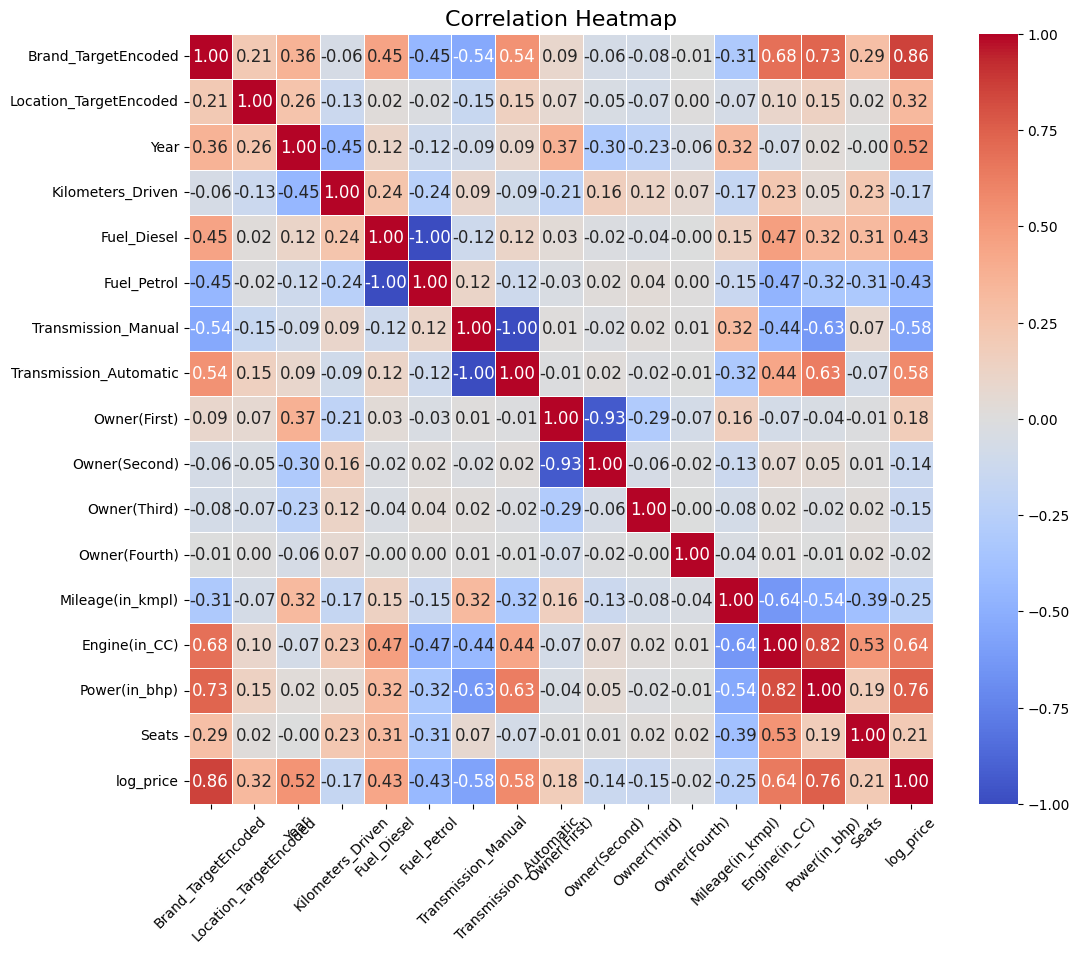

In [63]:

correlation = car_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={'fontsize': 12}, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

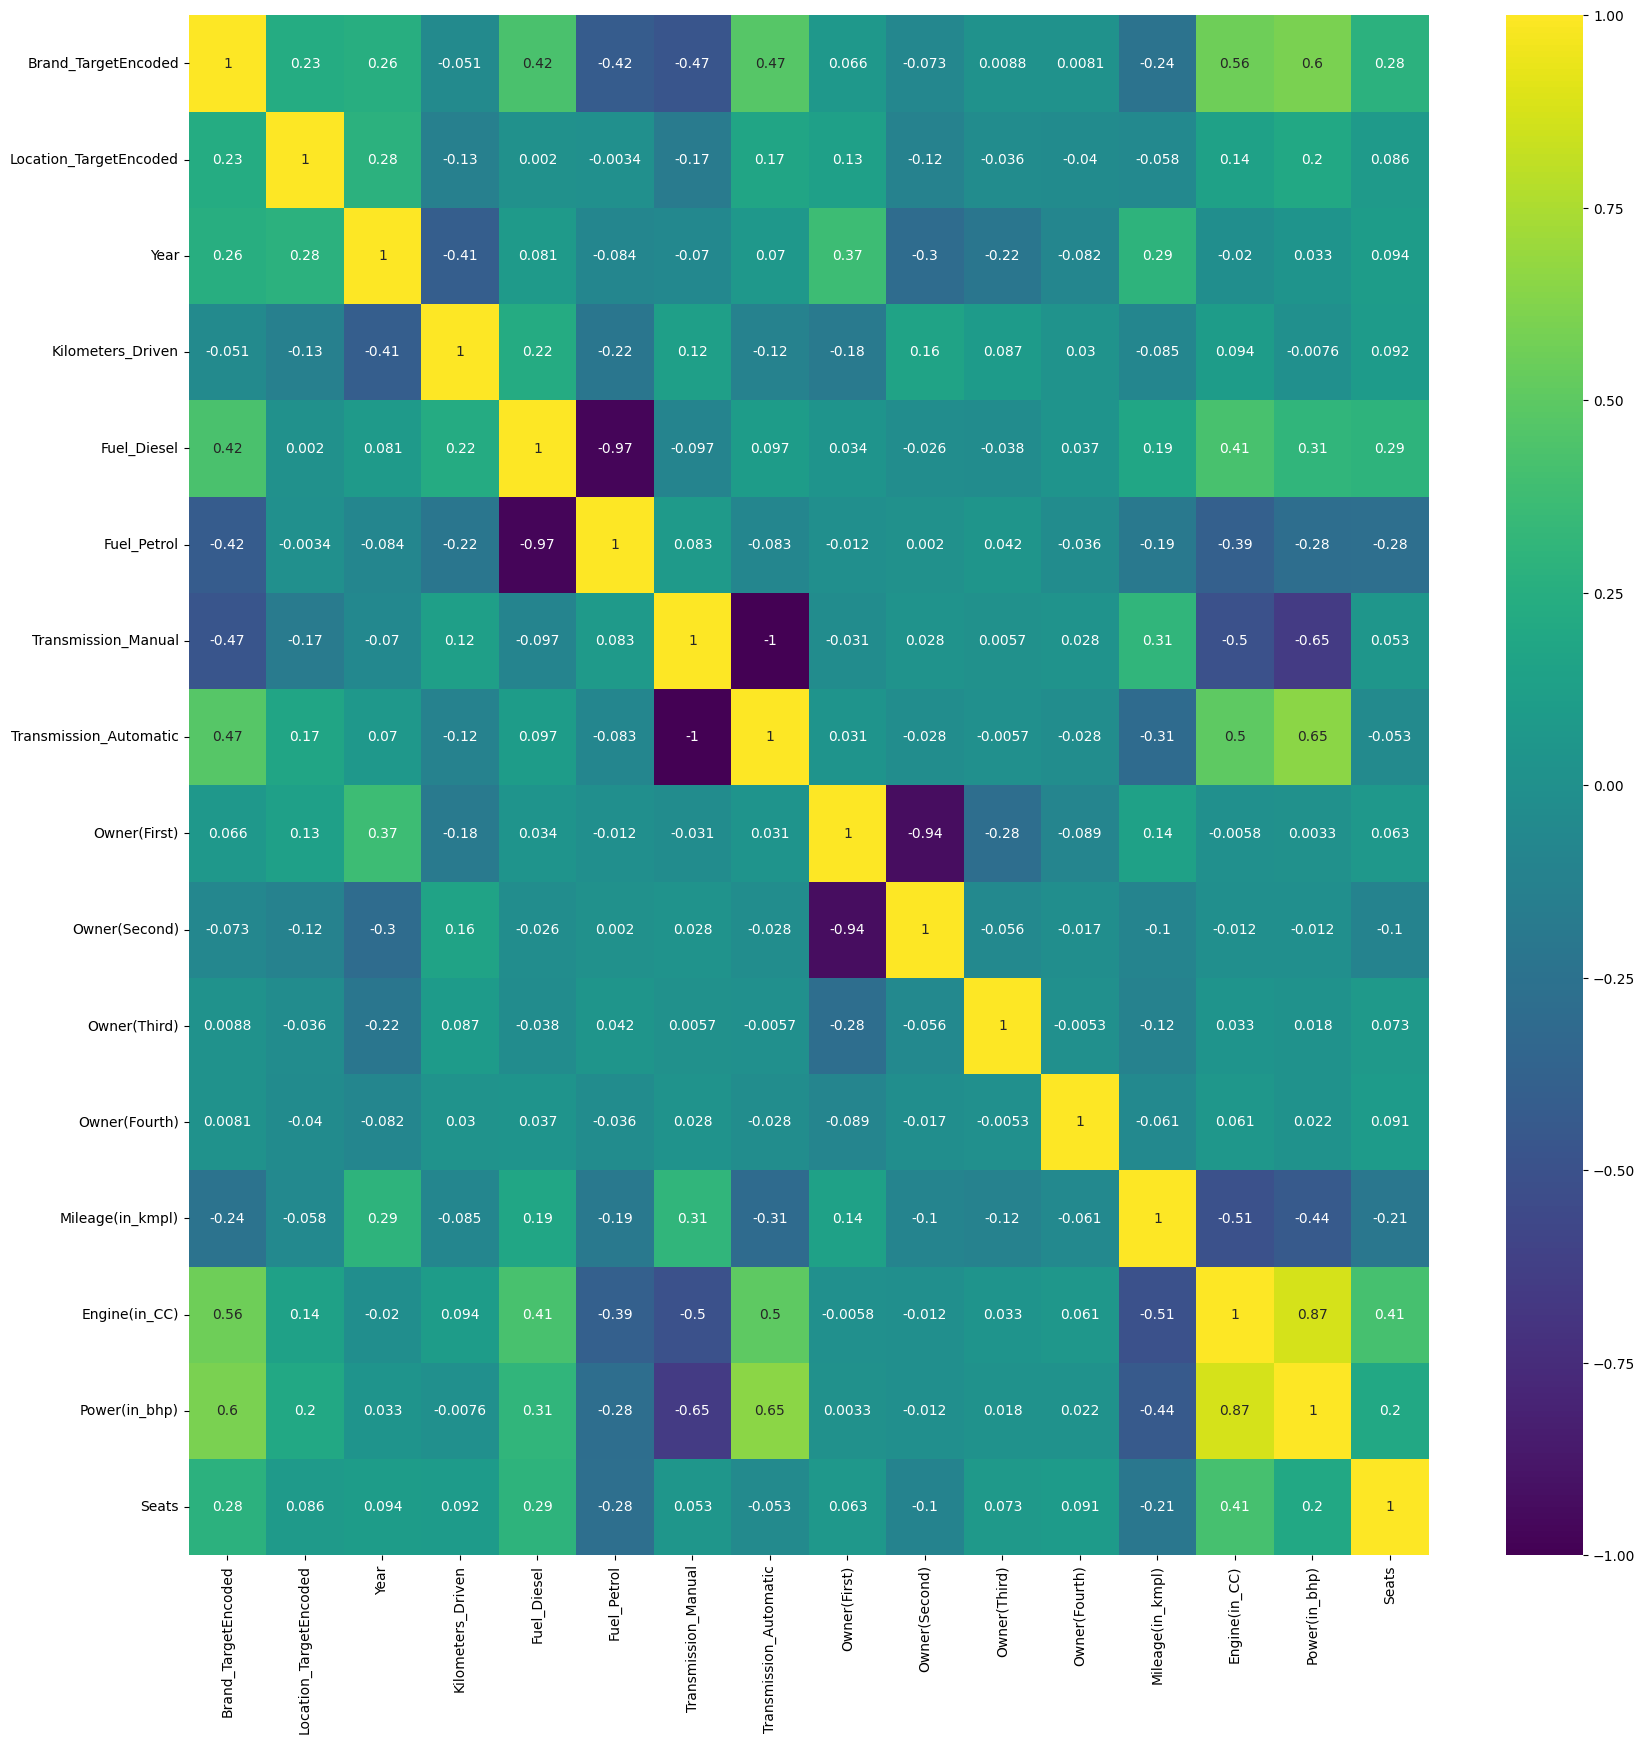

In [64]:
correlation=car_test_encoded.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation,cmap='viridis',annot=True,annot_kws={'fontsize':10})
plt.show()

MODEL DESCRIPTION

In [65]:
# Load data
car_encoded = pd.read_csv('car_encoded.csv')

# Separate features and target variable
X = car_encoded.drop('log_price', axis=1)
y = car_encoded['log_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression:
Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error: 10.628610288368964
R-squared: 0.8935909191564021


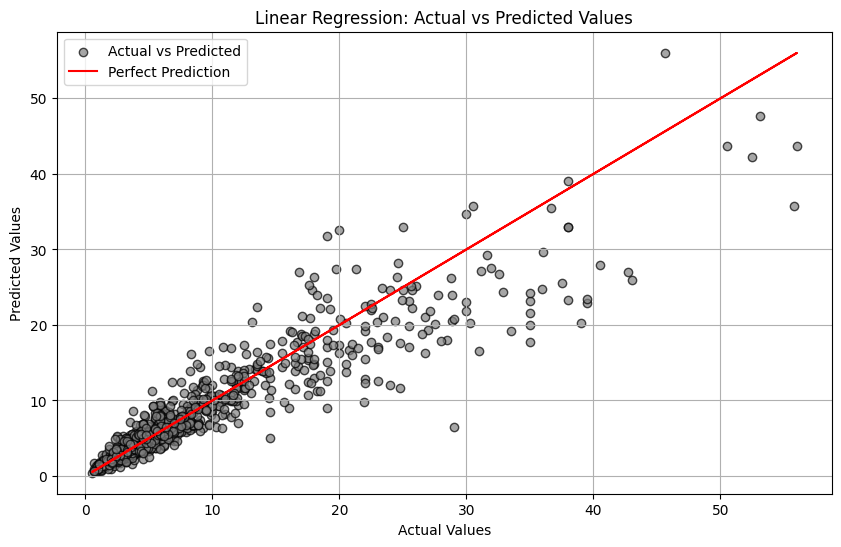

In [66]:
# Linear Regression
linear_reg = LinearRegression()
param_grid_linear = {'fit_intercept': [True, False]}
grid_search_linear = GridSearchCV(linear_reg, param_grid_linear, cv=5, scoring='neg_mean_squared_error')
grid_search_linear.fit(X_train_scaled, y_train)
linear_reg_best = grid_search_linear.best_estimator_
y_pred_linear = linear_reg_best.predict(X_test_scaled)
mse_linear = mean_squared_error(np.exp(y_test), np.exp(y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression:")
print("Best Hyperparameters:", grid_search_linear.best_params_)
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")

# Scatter plot of actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), np.exp(y_pred_linear), alpha=0.7, c='grey', edgecolors='k', label='Actual vs Predicted')
plt.plot(np.exp(y_test), np.exp(y_test), c='red', label='Perfect Prediction')  # Diagonal line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


Decision Tree Regression:
Best Hyperparameters: {'ccp_alpha': 0.009, 'criterion': 'friedman_mse', 'max_depth': 5}
Mean Squared Error: 18.113731368927816
R-squared: 0.8466646887917078


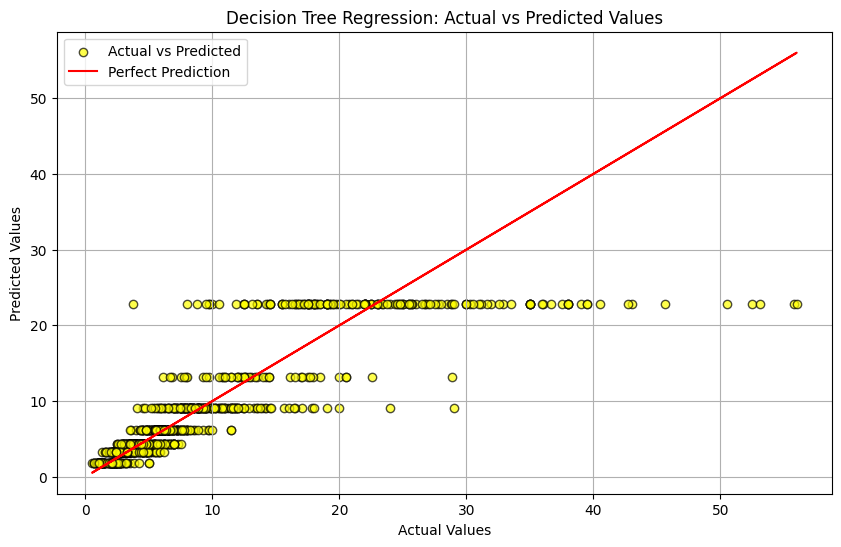

In [67]:
# Decision Tree Regression
dt_reg = DecisionTreeRegressor()
param_grid_dt = {'max_depth': [None, 5, 10, 20],
                 'criterion':('squared_error','friedman_mse',),
                 'ccp_alpha':(0.009,0.01,0.05,0.1),}
grid_search_dt = GridSearchCV(dt_reg, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train_scaled, y_train)
dt_reg_best = grid_search_dt.best_estimator_
y_pred_dt = dt_reg_best.predict(X_test_scaled)
mse_dt = mean_squared_error(np.exp(y_test), np.exp(y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)
print("\nDecision Tree Regression:")
print("Best Hyperparameters:", grid_search_dt.best_params_)
print(f"Mean Squared Error: {mse_dt}")
print(f"R-squared: {r2_dt}")

# Scatter plot of actual vs predicted values for Decision Tree Regression
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), np.exp(y_pred_dt), alpha=0.7, c='yellow', edgecolors='k', label='Actual vs Predicted')
plt.plot(np.exp(y_test), np.exp(y_test), c='red', label='Perfect Prediction')  # Diagonal line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression: Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\vishw\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vishw\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vishw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\vishw\AppData\Roaming\Python\Python311\site-


Random Forest Regression:
Best Hyperparameters: {'criterion': 'friedman_mse', 'max_depth': 20, 'n_estimators': 200}
Mean Squared Error: 4.146348606366145
R-squared: 0.954302575345987


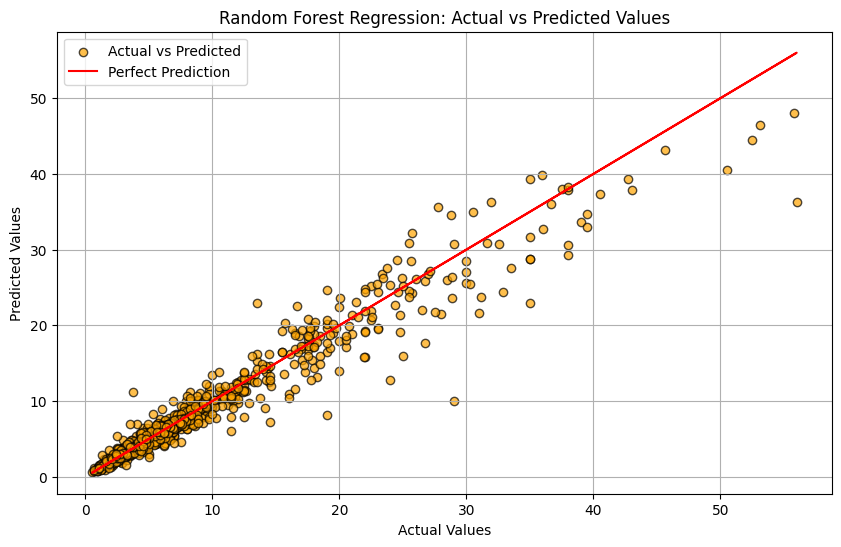

In [68]:
# Random Forest Regression
rf_reg = RandomForestRegressor()
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20],
                'criterion':('squared_error','friedman_mse','poisson'),}
grid_search_rf = GridSearchCV(rf_reg, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train_scaled, y_train)
rf_reg_best = grid_search_rf.best_estimator_
y_pred_rf = rf_reg_best.predict(X_test_scaled)
mse_rf = mean_squared_error(np.exp(y_test), np.exp(y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Regression:")
print("Best Hyperparameters:", grid_search_rf.best_params_)
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

# Scatter plot of actual vs predicted values for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), np.exp(y_pred_rf), alpha=0.7, c='orange', edgecolors='k', label='Actual vs Predicted')
plt.plot(np.exp(y_test), np.exp(y_test), c='red', label='Perfect Prediction')  # Diagonal line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


Ridge Regression:
Best Hyperparameters: {'alpha': 10}
Mean Squared Error: 10.660014223511777
R-squared: 0.8935842225885784


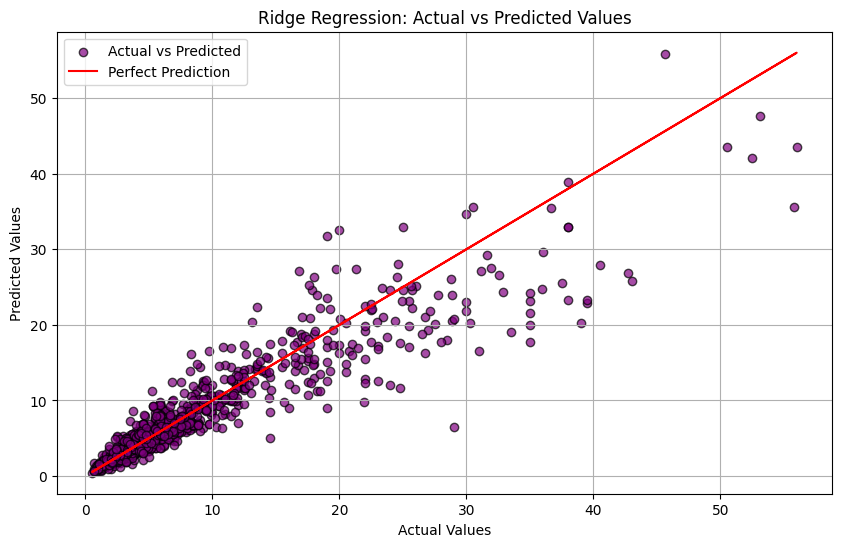

In [69]:
# Ridge Regression
ridge_reg = Ridge()
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10]}
grid_search_ridge = GridSearchCV(ridge_reg, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train_scaled, y_train)
ridge_reg_best = grid_search_ridge.best_estimator_
y_pred_ridge = ridge_reg_best.predict(X_test_scaled)
mse_ridge = mean_squared_error(np.exp(y_test), np.exp(y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
print("\nRidge Regression:")
print("Best Hyperparameters:", grid_search_ridge.best_params_)
print(f"Mean Squared Error: {mse_ridge}")
print(f"R-squared: {r2_ridge}")

# Scatter plot of actual vs predicted values for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), np.exp(y_pred_ridge), alpha=0.7, c='purple', edgecolors='k', label='Actual vs Predicted')
plt.plot(np.exp(y_test), np.exp(y_test), c='red', label='Perfect Prediction')  # Diagonal line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


Support Vector Regression:
Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Mean Squared Error: 6.78870812166853
R-squared: 0.9336285893350078


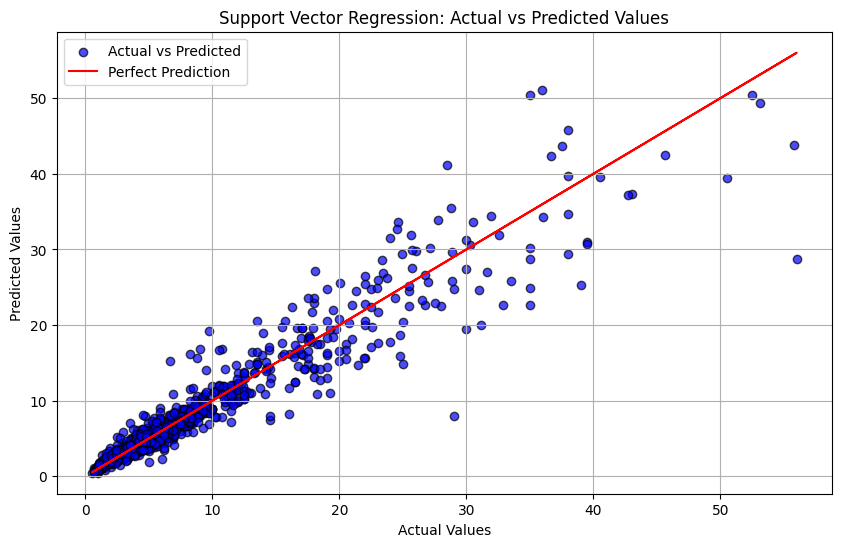

In [70]:
# Support Vector Regression
svr_reg = SVR()
param_grid_svr = {'C': [0.1, 1, 10], 
                  'kernel': ['linear', 'rbf','poly','sigmoid']}
grid_search_svr = GridSearchCV(svr_reg, param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train_scaled, y_train)
svr_reg_best = grid_search_svr.best_estimator_
y_pred_svr = svr_reg_best.predict(X_test_scaled)
mse_svr = mean_squared_error(np.exp(y_test), np.exp(y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)
print("\nSupport Vector Regression:")
print("Best Hyperparameters:", grid_search_svr.best_params_)
print(f"Mean Squared Error: {mse_svr}")
print(f"R-squared: {r2_svr}")

# Scatter plot of actual vs predicted values for Support Vector Regression
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), np.exp(y_pred_svr), alpha=0.7, c='blue', edgecolors='k', label='Actual vs Predicted')
plt.plot(np.exp(y_test), np.exp(y_test), c='red', label='Perfect Prediction')  # Diagonal line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Support Vector Regression: Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()



K-Nearest Neighbors Regression:
Best Hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}
Mean Squared Error: 8.260988140137778
R-squared: 0.9103781170774344


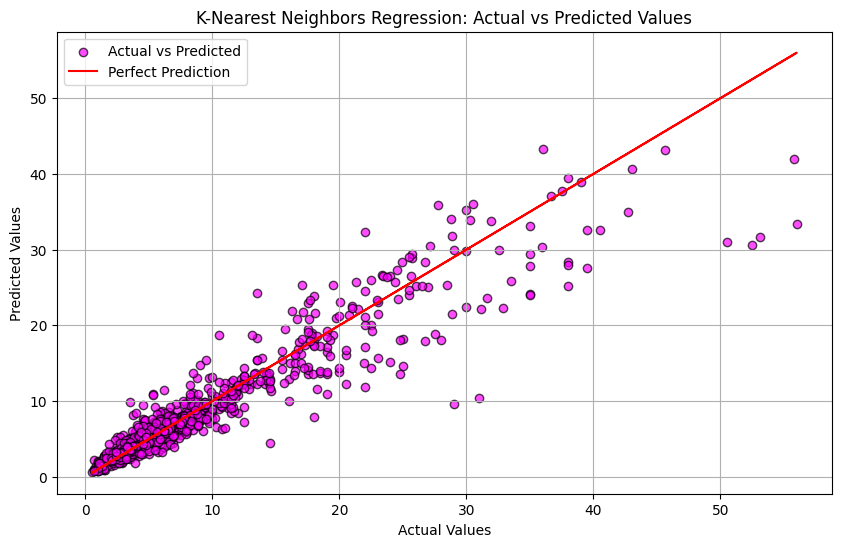

In [71]:
# K-Nearest Neighbors Regression
knn_reg = KNeighborsRegressor()
param_grid_knn = {'n_neighbors': [3, 5, 7],
                  'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn_reg, param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train_scaled, y_train)
knn_reg_best = grid_search_knn.best_estimator_
y_pred_knn = knn_reg_best.predict(X_test_scaled)
mse_knn = mean_squared_error(np.exp(y_test), np.exp(y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)
print("\nK-Nearest Neighbors Regression:")
print("Best Hyperparameters:", grid_search_knn.best_params_)
print(f"Mean Squared Error: {mse_knn}")
print(f"R-squared: {r2_knn}")

# Scatter plot of actual vs predicted values for K-Nearest Neighbors Regression
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), np.exp(y_pred_knn), alpha=0.7, c='magenta', edgecolors='k', label='Actual vs Predicted')
plt.plot(np.exp(y_test), np.exp(y_test), c='red', label='Perfect Prediction')  # Diagonal line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('K-Nearest Neighbors Regression: Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


Gradient Boosting Regression:
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Mean Squared Error: 3.4107225082808257
R-squared: 0.9605225212702924


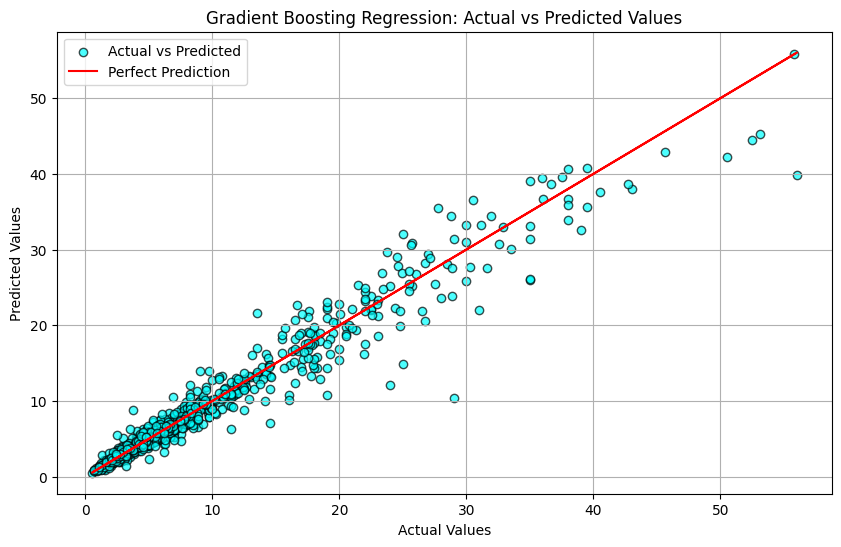

In [72]:
# Gradient Boosting Regression
gb_reg = GradientBoostingRegressor()
param_grid_gb = {'n_estimators': [50, 100, 200],
                 'learning_rate': [0.01, 0.1, 0.2], 
                 'max_depth': [3, 5, 10]}
grid_search_gb = GridSearchCV(gb_reg, param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train_scaled, y_train)
gb_reg_best = grid_search_gb.best_estimator_
y_pred_gb = gb_reg_best.predict(X_test_scaled)
mse_gb = mean_squared_error(np.exp(y_test), np.exp(y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)
print("\nGradient Boosting Regression:")
print("Best Hyperparameters:", grid_search_gb.best_params_)
print(f"Mean Squared Error: {mse_gb}")
print(f"R-squared: {r2_gb}")

# Scatter plot of actual vs predicted values for Gradient Boosting Regression
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), np.exp(y_pred_gb), alpha=0.7, c='cyan', edgecolors='k', label='Actual vs Predicted')
plt.plot(np.exp(y_test), np.exp(y_test), c='red', label='Perfect Prediction')  # Diagonal line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting Regression: Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

By testing various algorithm the Gradient Boosting Regression is the best model for our problem with,
Mean Squared Error: 3.473
R-squared: 0.963

In [73]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
train_data=pd.read_csv('car_encoded.csv')

In [75]:
train_data.head()

,Brand_TargetEncoded,Location_TargetEncoded,Year,Kilometers_Driven,Fuel_Diesel,Fuel_Petrol,Transmission_Manual,Transmission_Automatic,Owner(First),Owner(Second),Owner(Third),Owner(Fourth),Mileage(in_kmpl),Engine(in_CC),Power(in_bhp),Seats,log_price
0,1.702290,1.849076,2014,35214,0,1,0,1,0,1,0,0,23.10,998.0,67.04,5.0,1.163151
1,2.017469,1.849076,2013,71000,1,0,0,1,1,0,0,0,14.16,1968.0,174.30,5.0,3.068053
2,1.750150,1.508391,2012,111000,1,0,1,0,1,0,0,0,23.59,1364.0,67.10,5.0,1.558145
3,1.723895,1.441056,2016,68630,0,1,0,1,1,0,0,0,20.51,998.0,67.00,5.0,1.353255
4,1.826241,1.798172,2018,30000,1,0,1,0,1,0,0,0,22.54,1396.0,88.73,5.0,2.047693


In [76]:
test_data=pd.read_csv('car_test_encoded.csv')

In [77]:
test_data.head()

,Brand_TargetEncoded,Location_TargetEncoded,Year,Kilometers_Driven,Fuel_Diesel,Fuel_Petrol,Transmission_Manual,Transmission_Automatic,Owner(First),Owner(Second),Owner(Third),Owner(Fourth),Mileage(in_kmpl),Engine(in_CC),Power(in_bhp),Seats
0,1.702498,1.809005,2013,69000,1,0,1,0,1,0,0,0,23.4,1248.0,74.000,5.0
1,1.777649,2.005138,2017,26741,1,0,1,0,1,0,0,0,15.4,1997.0,120.000,7.0
2,2.090753,1.849076,2014,86000,1,0,1,0,1,0,0,0,15.1,2179.0,140.000,7.0
3,1.635759,1.508391,2016,52000,1,0,1,0,0,1,0,0,25.0,1396.0,69.010,5.0
4,1.777649,1.508391,2009,100000,0,1,1,0,1,0,0,0,0.0,1493.0,98.595,5.0


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_train = train_data.drop('log_price', axis=1)  
y_train = train_data['log_price']  

# Define the pipeline with a scaler and Gradient Boosting Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler for feature scaling
    ('gb_regressor', GradientBoostingRegressor())  # Gradient Boosting Regressor
])

# Define hyperparameters for Grid Search
params = {
    'gb_regressor__n_estimators': [100, 300, 500],
    'gb_regressor__learning_rate': [0.01, 0.1, 0.2],
    'gb_regressor__max_depth': [3, 5, 7]
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model after Grid Search
best_gb_model = grid_search.best_estimator_


X_test = test_data  
predictions = best_gb_model.predict(X_test)

# The 'predictions' variable now contains the predicted values for the test data using the best Gradient Boosting model with feature scaling


Best Hyperparameters: {'gb_regressor__learning_rate': 0.1, 'gb_regressor__max_depth': 5, 'gb_regressor__n_estimators': 500}


In [79]:
# Create a DataFrame with the predictions
predicted_df = pd.DataFrame({'Predicted_Target': predictions})

# Concatenate the test data with the predicted values
concatenated_data = pd.concat([test_data, predicted_df], axis=1)

concatenated_data

,Brand_TargetEncoded,Location_TargetEncoded,Year,Kilometers_Driven,Fuel_Diesel,Fuel_Petrol,Transmission_Manual,Transmission_Automatic,Owner(First),Owner(Second),Owner(Third),Owner(Fourth),Mileage(in_kmpl),Engine(in_CC),Power(in_bhp),Seats,Predicted_Target
0,1.702498,1.809005,2013,69000,1,0,1,0,1,0,0,0,23.40,1248.0,74.000,5.0,1.650018
1,1.777649,2.005138,2017,26741,1,0,1,0,1,0,0,0,15.40,1997.0,120.000,7.0,2.053159
2,2.090753,1.849076,2014,86000,1,0,1,0,1,0,0,0,15.10,2179.0,140.000,7.0,2.054475
3,1.635759,1.508391,2016,52000,1,0,1,0,0,1,0,0,25.00,1396.0,69.010,5.0,0.927980
4,1.777649,1.508391,2009,100000,0,1,1,0,1,0,0,0,0.00,1493.0,98.595,5.0,1.524978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,1.839953,1.828577,2008,78000,0,1,0,1,0,1,0,0,14.53,1794.0,138.100,5.0,1.304180
598,1.471787,1.570612,2012,55231,0,1,1,0,0,1,0,0,20.36,1197.0,78.900,5.0,1.042156
599,1.659891,1.441056,2010,130000,1,0,1,0,0,1,0,0,19.30,1248.0,73.900,5.0,1.036623
600,2.081812,1.798172,2016,39500,1,0,0,1,1,0,0,0,15.00,2143.0,204.000,5.0,3.578595


In [80]:
Price=np.exp(concatenated_data['Predicted_Target'])

concatenated_data['Price']=Price

concatenated_data.head() 

,Brand_TargetEncoded,Location_TargetEncoded,Year,Kilometers_Driven,Fuel_Diesel,Fuel_Petrol,Transmission_Manual,Transmission_Automatic,Owner(First),Owner(Second),Owner(Third),Owner(Fourth),Mileage(in_kmpl),Engine(in_CC),Power(in_bhp),Seats,Predicted_Target,Price
0,1.702498,1.809005,2013,69000,1,0,1,0,1,0,0,0,23.4,1248.0,74.000,5.0,1.650018,5.207074
1,1.777649,2.005138,2017,26741,1,0,1,0,1,0,0,0,15.4,1997.0,120.000,7.0,2.053159,7.792480
2,2.090753,1.849076,2014,86000,1,0,1,0,1,0,0,0,15.1,2179.0,140.000,7.0,2.054475,7.802739
3,1.635759,1.508391,2016,52000,1,0,1,0,0,1,0,0,25.0,1396.0,69.010,5.0,0.927980,2.529395
4,1.777649,1.508391,2009,100000,0,1,1,0,1,0,0,0,0.0,1493.0,98.595,5.0,1.524978,4.595042


In [81]:

# Save 'Price' column to a text file
concatenated_data['Price'].to_csv('price_column.txt', index=False, header=True)


In [82]:
concatenated_data.to_csv('final_predicted.csv', index=False)